In [1]:
"""CODE: DELORIAN: ORBIT CALCULATOR.

AUTHOR: MATIAS BLAÑA D.(main dev.), ROY BUSTOS (dev. Setup
        Malin1-extragalactic).

LOCATION: CHILE, SANTIAGO NOVEMBER 2023.

VERSION: (v1.1) ORBIT CALCULATOR FOR MW DWARF SATELLITES INCLUDING MW MULTIPLE
         POTENTIALS and M31, AND Fornax Cluster potentials, WITH ORBITS WITH
         COSMIC EXPANSION OPTIONS.

SCRIPT: EXAMPLES OF WORKSCRIPTS FOR USERS THAT LOADS STORED INITIAL CONDITIONS,
        INTEGRATIONS ROUTINES, DEFINE OBSERVABLES, ETC.

REFERENCES: PLEASE CITE THE ARTICLE WHERE DELOREAN WAS ORIGINALY PUBLISHED:
            Blaña et al. 2020, MNRAS, 497,3601-3622

URL: https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.3601B/abstract
"""


'CODE: DELORIAN: ORBIT CALCULATOR.\n\nAUTHOR: MATIAS BLAÑA D.(main dev.), ROY BUSTOS (dev. Setup\n        Malin1-extragalactic).\n\nLOCATION: CHILE, SANTIAGO NOVEMBER 2023.\n\nVERSION: (v1.1) ORBIT CALCULATOR FOR MW DWARF SATELLITES INCLUDING MW MULTIPLE\n         POTENTIALS and M31, AND Fornax Cluster potentials, WITH ORBITS WITH\n         COSMIC EXPANSION OPTIONS.\n\nSCRIPT: EXAMPLES OF WORKSCRIPTS FOR USERS THAT LOADS STORED INITIAL CONDITIONS,\n        INTEGRATIONS ROUTINES, DEFINE OBSERVABLES, ETC.\n\nREFERENCES: PLEASE CITE THE ARTICLE WHERE DELOREAN WAS ORIGINALY PUBLISHED:\n            Blaña et al. 2020, MNRAS, 497,3601-3622\n\nURL: https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.3601B/abstract\n'

In [2]:
import sys
import numpy as np
import numpy.random as rnd
import pandas as pd
import seaborn as sns
sys.path.append('Code')
rnd.seed(30101960)

from DELOREAN_v1 import *


directory  /home/javier/Documentos/GitHub/TTB2024
 
DELOREAN LOADED WITH 1.21GW: GODSPEED USER
             _           _           
    ________|_\         /_|________  
    \_______-''=.     .=''-_______/  
               \\    //             
           _____\\__//_____         
         .'                '.        
       _'______________.- -._'_      
      /  _____________________ \     
      |/[_][_]____DMC___[_][_]\|     
      \___<_>____________<_>___/     
      |\___================___/|     
      |__|'                '|__|     
                                     


In [4]:
####################################################################
# Globular clusters of interest: NGC 5694, NGC 5824,
# NGC 6229, NGC 7006, NGC 7492, Pal 13, Whiting 1 y Munoz 1
#
# CLUSTER        RA           DEC            R☉              V_r
#  NAME         [°]           [°]          [kpc]          [km/sec]
# NGC 5694   219.901245   -26.538776   34.84 ± 0.74   -139.55 ± 0.49
# NGC 5824   225.994156   -33.068138   31.71 ± 0.60    -25.24 ± 0.52
# NGC 6229   251.745249   +47.527796   30.11 ± 0.47   -137.89 ± 0.71
# NGC 7006   315.372626   +16.187323   39.32 ± 0.56   -383.47 ± 0.73
# NGC 7492   347.111170   -15.611469   24.39 ± 0.57   -176.70 ± 0.27
# Pal 13     346.685190    12.771539   23.48 ± 0.40     25.30 ± 0.22
# Whiting 1   30.737499    -3.252778   30.59 ± 1.17   -130.41 ± 1.79
# Munoz 1    15.0300056   66.9686944      45 ± 5         -137 ± 4
#
# CLUSTER       μ_α*cosδ            μ_δ               Mass
#  NAME         [mas/yr]         [mas/yr]             [M☉]
# NGC 5694   -0.476 ± 0.012   -1.102 ± 0.011   3.83 ± 0.38 * 10**5
# NGC 5824   -1.193 ± 0.010   -2.228 ± 0.009   7.79 ± 0.42 * 10**5
# NGC 6229   -1.156 ± 0.017   -0.461 ± 0.018   2.91 ± 0.94 * 10**5
# NGC 7006   -0.115 ± 0.010   -0.619 ± 0.009   2.29 ± 0.82 * 10**5
# NGC 7492    0.777 ± 0.011   -2.321 ± 0.011   2.58 ± 0.77 * 10**4
# Pal 13      1.740 ± 0.039    0.116 ± 0.032   2.74 ± 1.45 * 10**4
# Whiting 1  -0.244 ± 0.051   -2.019 ± 0.042   1.37 ± 0.27 * 10**3
# Munoz 1
####################################################################


# Create Monte Carlo simulation function

In [5]:
"""Create the function that will perform the Monte Carlo test."""


def mc_normal(mean, std_dev, samples):
    """Sample from the Normal Distribution."""
    results = []
    for _ in range(samples):
        results.append(rnd.normal(mean, std_dev))
    return np.array(results)

back_in_time = -5000 # Myr
s = 1000 # Number of samples


# Running 1000 orbits for the sample globular clusters by potential type

In [6]:
"""Running 1000 sample orbits for the globular cluster NGC 5694.

With a static Milky Way potential.
"""

# Initial conditions for NGC 5694: 219.901, −26.539, 34.84 ± 0.74,
# -139.55 ± 0.49, −0.464 ± 0.029, −1.105 ± 0.029

ra_11 = mc_normal(219.901, 0, s)
dec_11 = mc_normal(-26.539, 0, s)
distance_sun_11 = mc_normal(34.84, 0.74, s)
radial_velocity_11 = mc_normal(-139.55, 0.49, s)
propermotion_ra_11 = mc_normal(-0.464, 0.029, s)
propermotion_dec_11 = mc_normal(-1.105, 0.029, s)

orbits_param_11 = []
for i in range(len(ra_11)):
    orbits_param_11.append([ra_11[i], dec_11[i], distance_sun_11[i],
                            radial_velocity_11[i], propermotion_ra_11[i],
                            propermotion_dec_11[i]])

# Set parameters.
testorbit11 = StarCluster()
testorbit11.name = 'Testorbit11'
testorbit11.ncpu = 8
testorbit11.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit11.coordtype = 'Equatorial'
testorbit11.usebaumgardtcoord = True
testorbit11.orbprop = True
testorbit11.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_11)):
    if len(orbits_param_11) == 1:
        testorbit11.paramvars = [orbits_param_11[i]]
    elif len(orbits_param_11) > 1:
        testorbit11.paramvars = [orbits_param_11[0]]
        for i in range(1, len(orbits_param_11)):
            testorbit11.paramvars.append(orbits_param_11[i])

listobjects_init = [testorbit11]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit11 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit11.orbs[i][1][0]

Rperi_11 = []
Rapo_11 = []
el_11 = []

for i in range(0, len(testorbit11.orbs)):
    Rperi_11.append(testorbit11.orbs[i][1][0][0])
    Rapo_11.append(testorbit11.orbs[i][1][0][2])
    el_11.append(testorbit11.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.567778468132019 seconds to run in 1 cpu.
1E6 orbits would take a total of 9463.0 min or 157.72 hrs to run in 1 cpu.
1000 orbits could take a total of 9.46 min or 0.16 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.18 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 165.30 s, 2.76 min, 0.05 hrs


In [7]:
"""Running 1000 sample orbits for the globular cluster NGC 5824.

With a static Milky Way potential.
"""

# Initial conditions for NGC 5824: 225.994, −33.068, 31.71 ± 0.60,
# -25.24 ± 0.52, −1.189 ± 0.026, −2.234 ± 0.026
ra_12 = mc_normal(225.994, 0, s)
dec_12 = mc_normal(-33.068, 0, s)
distance_sun_12 = mc_normal(31.71, 0.60, s)
radial_velocity_12 = mc_normal(-25.24, 0.52, s)
propermotion_ra_12 = mc_normal(-1.189, 0.026, s)
propermotion_dec_12 = mc_normal(-2.234, 0.026, s)

orbits_param_12 = []
for i in range(len(ra_12)):
    orbits_param_12.append([ra_12[i], dec_12[i], distance_sun_12[i],
                            radial_velocity_12[i], propermotion_ra_12[i],
                            propermotion_dec_12[i]])

# Set parameters.
testorbit12 = StarCluster()
testorbit12.name = 'Testorbit12'
testorbit12.ncpu = 8
testorbit12.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit12.coordtype = 'Equatorial'
testorbit12.usebaumgardtcoord = True
testorbit12.orbprop = True
testorbit12.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_12)):
    if len(orbits_param_12) == 1:
        testorbit12.paramvars = [orbits_param_12[i]]
    elif len(orbits_param_12) > 1:
        testorbit12.paramvars = [orbits_param_12[0]]
        for i in range(1, len(orbits_param_12)):
            testorbit12.paramvars.append(orbits_param_12[i])

listobjects_init = [testorbit12]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit12 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit12.orbs[i][1][0]
Rperi_12 = []
Rapo_12 = []
el_12 = []

for i in range(0, len(testorbit12.orbs)):
    Rperi_12.append(testorbit12.orbs[i][1][0][0])
    Rapo_12.append(testorbit12.orbs[i][1][0][2])
    el_12.append(testorbit12.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.15650515556335448 seconds to run in 1 cpu.
1E6 orbits would take a total of 2608.4 min or 43.47 hrs to run in 1 cpu.
1000 orbits could take a total of 2.61 min or 0.04 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.33 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 63.33 s, 1.06 min, 0.02 hrs


In [8]:
"""Running 1000 sample orbits for the globular cluster NGC 6229.

With a static Milky Way potential.
"""

# Initial conditions for NGC 6229: 251.745, 47.528, 30.11 ± 0.47,
# −138.64 ± 0.77, −1.171 ± 0.026, −0.467 ± 0.027
ra_13 = mc_normal(251.745, 0, s)
dec_13 = mc_normal(47.528, 0, s)
distance_sun_13 = mc_normal(30.11, 0.47, s)
radial_velocity_13 = mc_normal(-138.64, 0.77, s)
propermotion_ra_13 = mc_normal(-1.171, 0.026, s)
propermotion_dec_13 = mc_normal(-0.467, 0.027, s)

orbits_param_13 = []
for i in range(len(ra_13)):
    orbits_param_13.append([ra_13[i], dec_13[i], distance_sun_13[i],
                            radial_velocity_13[i], propermotion_ra_13[i],
                            propermotion_dec_13[i]])

# Set parameters.
testorbit13 = StarCluster()
testorbit13.name = 'Testorbit13'
testorbit13.ncpu = 8
testorbit13.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit13.coordtype = 'Equatorial'
testorbit13.usebaumgardtcoord = True
testorbit13.orbprop = True
testorbit13.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_13)):
    if len(orbits_param_13) == 1:
        testorbit13.paramvars = [orbits_param_13[i]]
    elif len(orbits_param_13) > 1:
        testorbit13.paramvars = [orbits_param_13[0]]
        for i in range(1, len(orbits_param_13)):
            testorbit13.paramvars.append(orbits_param_13[i])

listobjects_init = [testorbit13]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit13 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit13.orbs[i][1][0]
Rperi_13 = []
Rapo_13 = []
el_13 = []

for i in range(0, len(testorbit13.orbs)):
    Rperi_13.append(testorbit13.orbs[i][1][0][0])
    Rapo_13.append(testorbit13.orbs[i][1][0][2])
    el_13.append(testorbit13.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.2430252313613892 seconds to run in 1 cpu.
1E6 orbits would take a total of 20717.1 min or 345.28 hrs to run in 1 cpu.
1000 orbits could take a total of 20.72 min or 0.35 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.59 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 422.25 s, 7.04 min, 0.12 hrs


In [9]:
"""Running 1000 sample orbits for the globular cluster NGC 7006.

With a static Milky Way potential.
"""

# Initial conditions for NGC 7006: 315.372, 16.187, 39.32 ± 0.56,
# -383.47 ± 0.73, −0.128 ± 0.027, −0.633 ± 0.027
ra_14 = mc_normal(315.372, 0, s)
dec_14 = mc_normal(16.187, 0, s)
distance_sun_14 = mc_normal(39.32, 0.56, s)
radial_velocity_14 = mc_normal(-383.47, 0.73, s)
propermotion_ra_14 = mc_normal(-0.128, 0.027, s)
propermotion_dec_14 = mc_normal(-0.633, 0.027, s)

orbits_param_14 = []
for i in range(len(ra_14)):
    orbits_param_14.append([ra_14[i], dec_14[i], distance_sun_14[i],
                            radial_velocity_14[i], propermotion_ra_14[i],
                            propermotion_dec_14[i]])

# Set parameters.
testorbit14 = StarCluster()
testorbit14.name = 'Testorbit14'
testorbit14.ncpu = 8
testorbit14.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit14.coordtype = 'Equatorial'
testorbit14.usebaumgardtcoord = True
testorbit14.orbprop = True
testorbit14.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_14)):
    if len(orbits_param_14) == 1:
        testorbit14.paramvars = [orbits_param_14[i]]
    elif len(orbits_param_14) > 1:
        testorbit14.paramvars = [orbits_param_14[0]]
        for i in range(1, len(orbits_param_14)):
            testorbit14.paramvars.append(orbits_param_14[i])

listobjects_init = [testorbit14]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit14 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit14.orbs[i][1][0]
Rperi_14 = []
Rapo_14 = []
el_14 = []

for i in range(0, len(testorbit14.orbs)):
    Rperi_14.append(testorbit14.orbs[i][1][0][0])
    Rapo_14.append(testorbit14.orbs[i][1][0][2])
    el_14.append(testorbit14.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.6177359580993652 seconds to run in 1 cpu.
1E6 orbits would take a total of 10295.6 min or 171.59 hrs to run in 1 cpu.
1000 orbits could take a total of 10.30 min or 0.17 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.29 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 203.91 s, 3.40 min, 0.06 hrs


In [10]:
"""Running 1000 sample orbits for the globular cluster NGC 7492.

With a static Milky Way potential.
"""

# Initial conditions for NGC 7492: 347.111, −15.611, 24.39 ± 0.57,
# -176.70 ± 0.27, 0.756 ± 0.028, −2.320 ± 0.028
ra_15 = mc_normal(347.111, 0, s)
dec_15 = mc_normal(-15.611, 0, s)
distance_sun_15 = mc_normal(24.39, 0.57, s)
radial_velocity_15 = mc_normal(-176.70, 0.27, s)
propermotion_ra_15 = mc_normal(0.756, 0.028, s)
propermotion_dec_15 = mc_normal(-2.320, 0.028, s)

orbits_param_15 = []
for i in range(len(ra_15)):
    orbits_param_15.append([ra_15[i], dec_15[i], distance_sun_15[i],
                            radial_velocity_15[i], propermotion_ra_15[i],
                            propermotion_dec_15[i]])

# Set parameters.
testorbit15 = StarCluster()
testorbit15.name = 'Testorbit15'
testorbit15.ncpu = 8
testorbit15.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit15.coordtype = 'Equatorial'
testorbit15.usebaumgardtcoord = True
testorbit15.orbprop = True
testorbit15.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_15)):
    if len(orbits_param_15) == 1:
        testorbit15.paramvars = [orbits_param_15[i]]
    elif len(orbits_param_15) > 1:
        testorbit15.paramvars = [orbits_param_15[0]]
        for i in range(1, len(orbits_param_15)):
            testorbit15.paramvars.append(orbits_param_15[i])

listobjects_init = [testorbit15]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit15 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit15.orbs[i][1][0]
Rperi_15 = []
Rapo_15 = []
el_15 = []

for i in range(0, len(testorbit15.orbs)):
    Rperi_15.append(testorbit15.orbs[i][1][0][0])
    Rapo_15.append(testorbit15.orbs[i][1][0][2])
    el_15.append(testorbit15.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.18612060546875 seconds to run in 1 cpu.
1E6 orbits would take a total of 19768.7 min or 329.48 hrs to run in 1 cpu.
1000 orbits could take a total of 19.77 min or 0.33 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.47 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 379.39 s, 6.32 min, 0.11 hrs


In [11]:
"""Running 1000 sample orbits for the globular cluster Pal 13.

With a static Milky Way potential.
"""

# Initial conditions for Pal 13: 346.685, 12.772, 23.48 ± 0.40,
# 25.87 ± 0.27, 1.748 ± 0.049, 0.104 ± 0.047
ra_16 = mc_normal(346.685, 0, s)
dec_16 = mc_normal(12.772, 0, s)
distance_sun_16 = mc_normal(23.48, 0.40, s)
radial_velocity_16 = mc_normal(25.87, 0.27, s)
propermotion_ra_16 = mc_normal(1.748, 0.049, s)
propermotion_dec_16 = mc_normal(0.104, 0.047, s)

orbits_param_16 = []
for i in range(len(ra_16)):
    orbits_param_16.append([ra_16[i], dec_16[i], distance_sun_16[i],
                            radial_velocity_16[i], propermotion_ra_16[i],
                            propermotion_dec_16[i]])

# Set parameters.
testorbit16 = StarCluster()
testorbit16.name = 'Testorbit16'
testorbit16.ncpu = 8
testorbit16.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit16.coordtype = 'Equatorial'
testorbit16.usebaumgardtcoord = True
testorbit16.orbprop = True
testorbit16.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_16)):
    if len(orbits_param_16) == 1:
        testorbit16.paramvars = [orbits_param_16[i]]
    elif len(orbits_param_16) > 1:
        testorbit16.paramvars = [orbits_param_16[0]]
        for i in range(1, len(orbits_param_16)):
            testorbit16.paramvars.append(orbits_param_16[i])

listobjects_init = [testorbit16]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit16 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit16.orbs[i][1][0]
Rperi_16 = []
Rapo_16 = []
el_16 = []

for i in range(0, len(testorbit16.orbs)):
    Rperi_16.append(testorbit16.orbs[i][1][0][0])
    Rapo_16.append(testorbit16.orbs[i][1][0][2])
    el_16.append(testorbit16.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.16778154373168946 seconds to run in 1 cpu.
1E6 orbits would take a total of 2796.4 min or 46.61 hrs to run in 1 cpu.
1000 orbits could take a total of 2.80 min or 0.05 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.35 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 65.40 s, 1.09 min, 0.02 hrs


In [12]:
"""Running 1000 sample orbits for the globular cluster Whiting 1.

With a static Milky Way potential.
"""

# Initial conditions for Whiting 1: 30.737, −3.253, 30.59 ± 1.17,
# -130.41 ± 1.79, −0.228 ± 0.065, −2.046 ± 0.056
ra_17 = mc_normal(30.737, 0, s)
dec_17 = mc_normal(-3.253, 0, s)
distance_sun_17 = mc_normal(30.59, 1.17, s)
radial_velocity_17 = mc_normal(-130.41, 1.79, s)
propermotion_ra_17 = mc_normal(-0.228, 0.065, s)
propermotion_dec_17 = mc_normal(-2.046, 0.056, s)

orbits_param_17 = []
for i in range(len(ra_17)):
    orbits_param_17.append([ra_17[i], dec_17[i], distance_sun_17[i],
                            radial_velocity_17[i], propermotion_ra_17[i],
                            propermotion_dec_17[i]])

# Set parameters.
testorbit17 = StarCluster()
testorbit17.name = 'Testorbit17'
testorbit17.ncpu = 8
testorbit17.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit17.coordtype = 'Equatorial'
testorbit17.usebaumgardtcoord = True
testorbit17.orbprop = True
testorbit17.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_17)):
    if len(orbits_param_17) == 1:
        testorbit17.paramvars = [orbits_param_17[i]]
    elif len(orbits_param_17) > 1:
        testorbit17.paramvars = [orbits_param_17[0]]
        for i in range(1, len(orbits_param_17)):
            testorbit17.paramvars.append(orbits_param_17[i])

listobjects_init = [testorbit17]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit17 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit17.orbs[i][1][0]
Rperi_17 = []
Rapo_17 = []
el_17 = []

for i in range(0, len(testorbit17.orbs)):
    Rperi_17.append(testorbit17.orbs[i][1][0][0])
    Rapo_17.append(testorbit17.orbs[i][1][0][2])
    el_17.append(testorbit17.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.17506086826324463 seconds to run in 1 cpu.
1E6 orbits would take a total of 2917.7 min or 48.63 hrs to run in 1 cpu.
1000 orbits could take a total of 2.92 min or 0.05 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.36 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 65.24 s, 1.09 min, 0.02 hrs


In [13]:
"""Running 1000 sample orbits for the globular cluster NGC 5694.

With a time-varying Milky Way potential.
"""

# Initial conditions for NGC 5694: 219.901, −26.539, 34.84 ± 0.74,
# -139.55 ± 0.49, −0.464 ± 0.029, −1.105 ± 0.029

ra_21 = mc_normal(219.901, 0, s)
dec_21 = mc_normal(-26.539, 0, s)
distance_sun_21 = mc_normal(34.84, 0.74, s)
radial_velocity_21 = mc_normal(-139.55, 0.49, s)
propermotion_ra_21 = mc_normal(-0.464, 0.029, s)
propermotion_dec_21 = mc_normal(-1.105, 0.029, s)

orbits_param_21 = []
for i in range(len(ra_21)):
    orbits_param_21.append([ra_21[i], dec_21[i], distance_sun_21[i],
                            radial_velocity_21[i], propermotion_ra_21[i],
                            propermotion_dec_21[i]])

# Set parameters.
testorbit21 = StarCluster()
testorbit21.name = 'Testorbit21'
testorbit21.ncpu = 8
testorbit21.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit21.coordtype = 'Equatorial'
testorbit21.usebaumgardtcoord = True
testorbit21.orbprop = True
testorbit21.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_21)):
    if len(orbits_param_21) == 1:
        testorbit21.paramvars = [orbits_param_21[i]]
    elif len(orbits_param_21) > 1:
        testorbit21.paramvars = [orbits_param_21[0]]
        for i in range(1, len(orbits_param_21)):
            testorbit21.paramvars.append(orbits_param_21[i])

listobjects_init = [testorbit21]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit21 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit21.orbs[i][1][0]

Rperi_21 = []
Rapo_21 = []
el_21 = []

for i in range(0, len(testorbit21.orbs)):
    Rperi_21.append(testorbit21.orbs[i][1][0][0])
    Rapo_21.append(testorbit21.orbs[i][1][0][2])
    el_21.append(testorbit21.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.48840508460998533 seconds to run in 1 cpu.
1E6 orbits would take a total of 8140.1 min or 135.67 hrs to run in 1 cpu.
1000 orbits could take a total of 8.14 min or 0.14 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.02 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 158.02 s, 2.63 min, 0.04 hrs


In [14]:
"""Running 1000 sample orbits for the globular cluster NGC 5824.

With a time-varying Milky Way potential.
"""

# Initial conditions for NGC 5824: 225.994, −33.068, 31.71 ± 0.60,
# -25.24 ± 0.52, −1.189 ± 0.026, −2.234 ± 0.026
ra_22 = mc_normal(225.994, 0, s)
dec_22 = mc_normal(-33.068, 0, s)
distance_sun_22 = mc_normal(31.71, 0.60, s)
radial_velocity_22 = mc_normal(-25.24, 0.52, s)
propermotion_ra_22 = mc_normal(-1.189, 0.026, s)
propermotion_dec_22 = mc_normal(-2.234, 0.026, s)

orbits_param_22 = []
for i in range(len(ra_22)):
    orbits_param_22.append([ra_22[i], dec_22[i], distance_sun_22[i],
                            radial_velocity_22[i], propermotion_ra_22[i],
                            propermotion_dec_22[i]])

# Set parameters.
testorbit22 = StarCluster()
testorbit22.name = 'Testorbit22'
testorbit22.ncpu = 8
testorbit22.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit22.coordtype = 'Equatorial'
testorbit22.usebaumgardtcoord = True
testorbit22.orbprop = True
testorbit22.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_22)):
    if len(orbits_param_22) == 1:
        testorbit22.paramvars = [orbits_param_22[i]]
    elif len(orbits_param_22) > 1:
        testorbit22.paramvars = [orbits_param_22[0]]
        for i in range(1, len(orbits_param_22)):
            testorbit22.paramvars.append(orbits_param_22[i])

listobjects_init = [testorbit22]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit22 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit22.orbs[i][1][0]
Rperi_22 = []
Rapo_22 = []
el_22 = []

for i in range(0, len(testorbit22.orbs)):
    Rperi_22.append(testorbit22.orbs[i][1][0][0])
    Rapo_22.append(testorbit22.orbs[i][1][0][2])
    el_22.append(testorbit22.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.1851666212081909 seconds to run in 1 cpu.
1E6 orbits would take a total of 3086.1 min or 51.44 hrs to run in 1 cpu.
1000 orbits could take a total of 3.09 min or 0.05 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.39 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 66.04 s, 1.10 min, 0.02 hrs


In [15]:
"""Running 1000 sample orbits for the globular cluster NGC 6229.

With a time-varying Milky Way potential.
"""

# Initial conditions for NGC 6229: 251.745, 47.528, 30.11 ± 0.47,
# −138.64 ± 0.77, −1.171 ± 0.026, −0.467 ± 0.027
ra_23 = mc_normal(251.745, 0, s)
dec_23 = mc_normal(47.528, 0, s)
distance_sun_23 = mc_normal(30.11, 0.47, s)
radial_velocity_23 = mc_normal(-138.64, 0.77, s)
propermotion_ra_23 = mc_normal(-1.171, 0.026, s)
propermotion_dec_23 = mc_normal(-0.467, 0.027, s)

orbits_param_23 = []
for i in range(len(ra_23)):
    orbits_param_23.append([ra_23[i], dec_23[i], distance_sun_23[i],
                            radial_velocity_23[i], propermotion_ra_23[i],
                            propermotion_dec_23[i]])

# Set parameters.
testorbit23 = StarCluster()
testorbit23.name = 'Testorbit23'
testorbit23.ncpu = 8
testorbit23.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit23.coordtype = 'Equatorial'
testorbit23.usebaumgardtcoord = True
testorbit23.orbprop = True
testorbit23.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_23)):
    if len(orbits_param_23) == 1:
        testorbit23.paramvars = [orbits_param_23[i]]
    elif len(orbits_param_23) > 1:
        testorbit23.paramvars = [orbits_param_23[0]]
        for i in range(1, len(orbits_param_23)):
            testorbit23.paramvars.append(orbits_param_23[i])

listobjects_init = [testorbit23]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit23 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit23.orbs[i][1][0]
Rperi_23 = []
Rapo_23 = []
el_23 = []

for i in range(0, len(testorbit23.orbs)):
    Rperi_23.append(testorbit23.orbs[i][1][0][0])
    Rapo_23.append(testorbit23.orbs[i][1][0][2])
    el_23.append(testorbit23.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.2597851753234863 seconds to run in 1 cpu.
1E6 orbits would take a total of 20996.4 min or 349.94 hrs to run in 1 cpu.
1000 orbits could take a total of 21.00 min or 0.35 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.62 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 405.61 s, 6.76 min, 0.11 hrs


In [16]:
"""Running 1000 sample orbits for the globular cluster NGC 7006.

With a time-varying Milky Way potential.
"""

# Initial conditions for NGC 7006: 315.372, 16.187, 39.32 ± 0.56,
# -383.47 ± 0.73, −0.128 ± 0.027, −0.633 ± 0.027
ra_24 = mc_normal(315.372, 0, s)
dec_24 = mc_normal(16.187, 0, s)
distance_sun_24 = mc_normal(39.32, 0.56, s)
radial_velocity_24 = mc_normal(-383.47, 0.73, s)
propermotion_ra_24 = mc_normal(-0.128, 0.027, s)
propermotion_dec_24 = mc_normal(-0.633, 0.027, s)

orbits_param_24 = []
for i in range(len(ra_24)):
    orbits_param_24.append([ra_24[i], dec_24[i], distance_sun_24[i],
                            radial_velocity_24[i], propermotion_ra_24[i],
                            propermotion_dec_24[i]])

# Set parameters.
testorbit24 = StarCluster()
testorbit24.name = 'Testorbit24'
testorbit24.ncpu = 8
testorbit24.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit24.coordtype = 'Equatorial'
testorbit24.usebaumgardtcoord = True
testorbit24.orbprop = True
testorbit24.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_24)):
    if len(orbits_param_24) == 1:
        testorbit24.paramvars = [orbits_param_24[i]]
    elif len(orbits_param_24) > 1:
        testorbit24.paramvars = [orbits_param_24[0]]
        for i in range(1, len(orbits_param_24)):
            testorbit24.paramvars.append(orbits_param_24[i])

listobjects_init = [testorbit24]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit24 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit24.orbs[i][1][0]
Rperi_24 = []
Rapo_24 = []
el_24 = []

for i in range(0, len(testorbit24.orbs)):
    Rperi_24.append(testorbit24.orbs[i][1][0][0])
    Rapo_24.append(testorbit24.orbs[i][1][0][2])
    el_24.append(testorbit24.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.6054433584213257 seconds to run in 1 cpu.
1E6 orbits would take a total of 10090.7 min or 168.18 hrs to run in 1 cpu.
1000 orbits could take a total of 10.09 min or 0.17 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.26 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 197.55 s, 3.29 min, 0.05 hrs


In [17]:
"""Running 1000 sample orbits for the globular cluster NGC 7492.

With a time-varying Milky Way potential.
"""

# Initial conditions for NGC 7492: 347.111, −15.611, 24.39 ± 0.57,
# -176.70 ± 0.27, 0.756 ± 0.028, −2.320 ± 0.028
ra_25 = mc_normal(347.111, 0, s)
dec_25 = mc_normal(-15.611, 0, s)
distance_sun_25 = mc_normal(24.39, 0.57, s)
radial_velocity_25 = mc_normal(-176.70, 0.27, s)
propermotion_ra_25 = mc_normal(0.756, 0.028, s)
propermotion_dec_25 = mc_normal(-2.320, 0.028, s)

orbits_param_25 = []
for i in range(len(ra_25)):
    orbits_param_25.append([ra_25[i], dec_25[i], distance_sun_25[i],
                            radial_velocity_25[i], propermotion_ra_25[i],
                            propermotion_dec_25[i]])

# Set parameters.
testorbit25 = StarCluster()
testorbit25.name = 'Testorbit25'
testorbit25.ncpu = 8
testorbit25.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit25.coordtype = 'Equatorial'
testorbit25.usebaumgardtcoord = True
testorbit25.orbprop = True
testorbit25.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_25)):
    if len(orbits_param_25) == 1:
        testorbit25.paramvars = [orbits_param_25[i]]
    elif len(orbits_param_25) > 1:
        testorbit25.paramvars = [orbits_param_25[0]]
        for i in range(1, len(orbits_param_25)):
            testorbit25.paramvars.append(orbits_param_25[i])

listobjects_init = [testorbit25]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit25 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit25.orbs[i][1][0]
Rperi_25 = []
Rapo_25 = []
el_25 = []

for i in range(0, len(testorbit25.orbs)):
    Rperi_25.append(testorbit25.orbs[i][1][0][0])
    Rapo_25.append(testorbit25.orbs[i][1][0][2])
    el_25.append(testorbit25.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.1000743865966798 seconds to run in 1 cpu.
1E6 orbits would take a total of 18334.6 min or 305.58 hrs to run in 1 cpu.
1000 orbits could take a total of 18.33 min or 0.31 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.29 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 343.94 s, 5.73 min, 0.10 hrs


In [18]:
"""Running 1000 sample orbits for the globular cluster Pal 13.

With a time-varying Milky Way potential.
"""

# Initial conditions for Pal 13: 346.685, 12.772, 23.48 ± 0.40,
# 25.87 ± 0.27, 1.748 ± 0.049, 0.104 ± 0.047
ra_26 = mc_normal(346.685, 0, s)
dec_26 = mc_normal(12.772, 0, s)
distance_sun_26 = mc_normal(23.48, 0.40, s)
radial_velocity_26 = mc_normal(25.87, 0.27, s)
propermotion_ra_26 = mc_normal(1.748, 0.049, s)
propermotion_dec_26 = mc_normal(0.104, 0.047, s)

orbits_param_26 = []
for i in range(len(ra_26)):
    orbits_param_26.append([ra_26[i], dec_26[i], distance_sun_26[i],
                            radial_velocity_26[i], propermotion_ra_26[i],
                            propermotion_dec_26[i]])

# Set parameters.
testorbit26 = StarCluster()
testorbit26.name = 'Testorbit26'
testorbit26.ncpu = 8
testorbit26.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit26.coordtype = 'Equatorial'
testorbit26.usebaumgardtcoord = True
testorbit26.orbprop = True
testorbit26.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_26)):
    if len(orbits_param_26) == 1:
        testorbit26.paramvars = [orbits_param_26[i]]
    elif len(orbits_param_26) > 1:
        testorbit26.paramvars = [orbits_param_26[0]]
        for i in range(1, len(orbits_param_26)):
            testorbit26.paramvars.append(orbits_param_26[i])

listobjects_init = [testorbit26]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit26 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit26.orbs[i][1][0]
Rperi_26 = []
Rapo_26 = []
el_26 = []

for i in range(0, len(testorbit26.orbs)):
    Rperi_26.append(testorbit26.orbs[i][1][0][0])
    Rapo_26.append(testorbit26.orbs[i][1][0][2])
    el_26.append(testorbit26.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.15768556594848632 seconds to run in 1 cpu.
1E6 orbits would take a total of 2628.1 min or 43.80 hrs to run in 1 cpu.
1000 orbits could take a total of 2.63 min or 0.04 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.33 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 63.75 s, 1.06 min, 0.02 hrs


In [19]:
"""Running 1000 sample orbits for the globular cluster Whiting 1.

With a time-varying Milky Way potential.
"""

# Initial conditions for Whiting 1: 30.737, −3.253, 30.59 ± 1.17,
# -130.41 ± 1.79, −0.228 ± 0.065, −2.046 ± 0.056
ra_27 = mc_normal(30.737, 0, s)
dec_27 = mc_normal(-3.253, 0, s)
distance_sun_27 = mc_normal(30.59, 1.17, s)
radial_velocity_27 = mc_normal(-130.41, 1.79, s)
propermotion_ra_27 = mc_normal(-0.228, 0.065, s)
propermotion_dec_27 = mc_normal(-2.046, 0.056, s)

orbits_param_27 = []
for i in range(len(ra_27)):
    orbits_param_27.append([ra_27[i], dec_27[i], distance_sun_27[i],
                            radial_velocity_27[i], propermotion_ra_27[i],
                            propermotion_dec_27[i]])

# Set parameters.
testorbit27 = StarCluster()
testorbit27.name = 'Testorbit27'
testorbit27.ncpu = 8
testorbit27.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit27.coordtype = 'Equatorial'
testorbit27.usebaumgardtcoord = True
testorbit27.orbprop = True
testorbit27.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_27)):
    if len(orbits_param_27) == 1:
        testorbit27.paramvars = [orbits_param_27[i]]
    elif len(orbits_param_27) > 1:
        testorbit27.paramvars = [orbits_param_27[0]]
        for i in range(1, len(orbits_param_27)):
            testorbit27.paramvars.append(orbits_param_27[i])

listobjects_init = [testorbit27]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit27 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit27.orbs[i][1][0]
Rperi_27 = []
Rapo_27 = []
el_27 = []

for i in range(0, len(testorbit27.orbs)):
    Rperi_27.append(testorbit27.orbs[i][1][0][0])
    Rapo_27.append(testorbit27.orbs[i][1][0][2])
    el_27.append(testorbit27.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.1580130100250244 seconds to run in 1 cpu.
1E6 orbits would take a total of 2633.6 min or 43.89 hrs to run in 1 cpu.
1000 orbits could take a total of 2.63 min or 0.04 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.33 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 64.10 s, 1.07 min, 0.02 hrs


In [20]:
"""Running 1000 sample orbits for the globular cluster NGC 5694.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 5694: 219.901, −26.539, 34.84 ± 0.74,
# -139.55 ± 0.49, −0.464 ± 0.029, −1.105 ± 0.029

ra_31 = mc_normal(219.901, 0, s)
dec_31 = mc_normal(-26.539, 0, s)
distance_sun_31 = mc_normal(34.84, 0.74, s)
radial_velocity_31 = mc_normal(-139.55, 0.49, s)
propermotion_ra_31 = mc_normal(-0.464, 0.029, s)
propermotion_dec_31 = mc_normal(-1.105, 0.029, s)

orbits_param_31 = []
for i in range(len(ra_31)):
    orbits_param_31.append([ra_31[i], dec_31[i], distance_sun_31[i],
                            radial_velocity_31[i], propermotion_ra_31[i],
                            propermotion_dec_31[i]])

# Set parameters.
testorbit31 = StarCluster()
testorbit31.name = 'Testorbit31'
testorbit31.ncpu = 8
testorbit31.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit31.coordtype = 'Equatorial'
testorbit31.usebaumgardtcoord = True
testorbit31.orbprop = True
testorbit31.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_31)):
    if len(orbits_param_31) == 1:
        testorbit31.paramvars = [orbits_param_31[i]]
    elif len(orbits_param_31) > 1:
        testorbit31.paramvars = [orbits_param_31[0]]
        for i in range(1, len(orbits_param_31)):
            testorbit31.paramvars.append(orbits_param_31[i])

listobjects_init = [testorbit31]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit31 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit31.orbs[i][1][0]

Rperi_31 = []
Rapo_31 = []
el_31 = []

for i in range(0, len(testorbit31.orbs)):
    Rperi_31.append(testorbit31.orbs[i][1][0][0])
    Rapo_31.append(testorbit31.orbs[i][1][0][2])
    el_31.append(testorbit31.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.5141952276229859 seconds to run in 1 cpu.
1E6 orbits would take a total of 8569.9 min or 142.83 hrs to run in 1 cpu.
1000 orbits could take a total of 8.57 min or 0.14 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.07 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 168.17 s, 2.80 min, 0.05 hrs


In [21]:
"""Running 1000 sample orbits for the globular cluster NGC 5824.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 5824: 225.994, −33.068, 31.71 ± 0.60,
# -25.24 ± 0.52, −1.189 ± 0.026, −2.234 ± 0.026
ra_32 = mc_normal(225.994, 0, s)
dec_32 = mc_normal(-33.068, 0, s)
distance_sun_32 = mc_normal(31.71, 0.60, s)
radial_velocity_32 = mc_normal(-25.24, 0.52, s)
propermotion_ra_32 = mc_normal(-1.189, 0.026, s)
propermotion_dec_32 = mc_normal(-2.234, 0.026, s)

orbits_param_32 = []
for i in range(len(ra_32)):
    orbits_param_32.append([ra_32[i], dec_32[i], distance_sun_32[i],
                            radial_velocity_32[i], propermotion_ra_32[i],
                            propermotion_dec_32[i]])

# Set parameters.
testorbit32 = StarCluster()
testorbit32.name = 'Testorbit32'
testorbit32.ncpu = 8
testorbit32.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit32.coordtype = 'Equatorial'
testorbit32.usebaumgardtcoord = True
testorbit32.orbprop = True
testorbit32.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_32)):
    if len(orbits_param_32) == 1:
        testorbit32.paramvars = [orbits_param_32[i]]
    elif len(orbits_param_32) > 1:
        testorbit32.paramvars = [orbits_param_32[0]]
        for i in range(1, len(orbits_param_32)):
            testorbit32.paramvars.append(orbits_param_32[i])

listobjects_init = [testorbit32]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit32 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit32.orbs[i][1][0]
Rperi_32 = []
Rapo_32 = []
el_32 = []

for i in range(0, len(testorbit32.orbs)):
    Rperi_32.append(testorbit32.orbs[i][1][0][0])
    Rapo_32.append(testorbit32.orbs[i][1][0][2])
    el_32.append(testorbit32.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.22296414375305176 seconds to run in 1 cpu.
1E6 orbits would take a total of 3716.1 min or 61.93 hrs to run in 1 cpu.
1000 orbits could take a total of 3.72 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.46 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 61.88 s, 1.03 min, 0.02 hrs


In [22]:
"""Running 1000 sample orbits for the globular cluster NGC 6229.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 6229: 251.745, 47.528, 30.11 ± 0.47,
# −138.64 ± 0.77, −1.171 ± 0.026, −0.467 ± 0.027
ra_33 = mc_normal(251.745, 0, s)
dec_33 = mc_normal(47.528, 0, s)
distance_sun_33 = mc_normal(30.11, 0.47, s)
radial_velocity_33 = mc_normal(-138.64, 0.77, s)
propermotion_ra_33 = mc_normal(-1.171, 0.026, s)
propermotion_dec_33 = mc_normal(-0.467, 0.027, s)

orbits_param_33 = []
for i in range(len(ra_33)):
    orbits_param_33.append([ra_33[i], dec_33[i], distance_sun_33[i],
                            radial_velocity_33[i], propermotion_ra_33[i],
                            propermotion_dec_33[i]])

# Set parameters.
testorbit33 = StarCluster()
testorbit33.name = 'Testorbit33'
testorbit33.ncpu = 8
testorbit33.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit33.coordtype = 'Equatorial'
testorbit33.usebaumgardtcoord = True
testorbit33.orbprop = True
testorbit33.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_33)):
    if len(orbits_param_33) == 1:
        testorbit33.paramvars = [orbits_param_33[i]]
    elif len(orbits_param_33) > 1:
        testorbit33.paramvars = [orbits_param_33[0]]
        for i in range(1, len(orbits_param_33)):
            testorbit33.paramvars.append(orbits_param_33[i])

listobjects_init = [testorbit33]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit33 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit33.orbs[i][1][0]
Rperi_33 = []
Rapo_33 = []
el_33 = []

for i in range(0, len(testorbit33.orbs)):
    Rperi_33.append(testorbit33.orbs[i][1][0][0])
    Rapo_33.append(testorbit33.orbs[i][1][0][2])
    el_33.append(testorbit33.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.391684889793396 seconds to run in 1 cpu.
1E6 orbits would take a total of 23194.7 min or 386.58 hrs to run in 1 cpu.
1000 orbits could take a total of 23.19 min or 0.39 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.90 min or 0.05 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 336.37 s, 5.61 min, 0.09 hrs


In [23]:
"""Running 1000 sample orbits for the globular cluster NGC 7006.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 7006: 315.372, 16.187, 39.32 ± 0.56,
# -383.47 ± 0.73, −0.128 ± 0.027, −0.633 ± 0.027
ra_34 = mc_normal(315.372, 0, s)
dec_34 = mc_normal(16.187, 0, s)
distance_sun_34 = mc_normal(39.32, 0.56, s)
radial_velocity_34 = mc_normal(-383.47, 0.73, s)
propermotion_ra_34 = mc_normal(-0.128, 0.027, s)
propermotion_dec_34 = mc_normal(-0.633, 0.027, s)

orbits_param_34 = []
for i in range(len(ra_34)):
    orbits_param_34.append([ra_34[i], dec_34[i], distance_sun_34[i],
                            radial_velocity_34[i], propermotion_ra_34[i],
                            propermotion_dec_34[i]])

# Set parameters.
testorbit34 = StarCluster()
testorbit34.name = 'Testorbit34'
testorbit34.ncpu = 8
testorbit34.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit34.coordtype = 'Equatorial'
testorbit34.usebaumgardtcoord = True
testorbit34.orbprop = True
testorbit34.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_34)):
    if len(orbits_param_34) == 1:
        testorbit34.paramvars = [orbits_param_34[i]]
    elif len(orbits_param_34) > 1:
        testorbit34.paramvars = [orbits_param_34[0]]
        for i in range(1, len(orbits_param_34)):
            testorbit34.paramvars.append(orbits_param_34[i])

listobjects_init = [testorbit34]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit34 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit34.orbs[i][1][0]
Rperi_34 = []
Rapo_34 = []
el_34 = []

for i in range(0, len(testorbit34.orbs)):
    Rperi_34.append(testorbit34.orbs[i][1][0][0])
    Rapo_34.append(testorbit34.orbs[i][1][0][2])
    el_34.append(testorbit34.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.659281063079834 seconds to run in 1 cpu.
1E6 orbits would take a total of 10988.0 min or 183.13 hrs to run in 1 cpu.
1000 orbits could take a total of 10.99 min or 0.18 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.37 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 167.16 s, 2.79 min, 0.05 hrs


In [24]:
"""Running 1000 sample orbits for the globular cluster NGC 7492.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 7492: 347.111, −15.611, 24.39 ± 0.57,
# -176.70 ± 0.27, 0.756 ± 0.028, −2.320 ± 0.028
ra_35 = mc_normal(347.111, 0, s)
dec_35 = mc_normal(-15.611, 0, s)
distance_sun_35 = mc_normal(24.39, 0.57, s)
radial_velocity_35 = mc_normal(-176.70, 0.27, s)
propermotion_ra_35 = mc_normal(0.756, 0.028, s)
propermotion_dec_35 = mc_normal(-2.320, 0.028, s)

orbits_param_35 = []
for i in range(len(ra_35)):
    orbits_param_35.append([ra_35[i], dec_35[i], distance_sun_35[i],
                            radial_velocity_35[i], propermotion_ra_35[i],
                            propermotion_dec_35[i]])

# Set parameters.
testorbit35 = StarCluster()
testorbit35.name = 'Testorbit35'
testorbit35.ncpu = 8
testorbit35.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit35.coordtype = 'Equatorial'
testorbit35.usebaumgardtcoord = True
testorbit35.orbprop = True
testorbit35.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_35)):
    if len(orbits_param_35) == 1:
        testorbit35.paramvars = [orbits_param_35[i]]
    elif len(orbits_param_35) > 1:
        testorbit35.paramvars = [orbits_param_35[0]]
        for i in range(1, len(orbits_param_35)):
            testorbit35.paramvars.append(orbits_param_35[i])

listobjects_init = [testorbit35]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit35 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit35.orbs[i][1][0]
Rperi_35 = []
Rapo_35 = []
el_35 = []

for i in range(0, len(testorbit35.orbs)):
    Rperi_35.append(testorbit35.orbs[i][1][0][0])
    Rapo_35.append(testorbit35.orbs[i][1][0][2])
    el_35.append(testorbit35.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.0903213024139404 seconds to run in 1 cpu.
1E6 orbits would take a total of 18172.0 min or 302.87 hrs to run in 1 cpu.
1000 orbits could take a total of 18.17 min or 0.30 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.27 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 291.18 s, 4.85 min, 0.08 hrs


In [25]:
"""Running 1000 sample orbits for the globular cluster Pal 13.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for Pal 13: 346.685, 12.772, 23.48 ± 0.40,
# 25.87 ± 0.27, 1.748 ± 0.049, 0.104 ± 0.047
ra_36 = mc_normal(346.685, 0, s)
dec_36 = mc_normal(12.772, 0, s)
distance_sun_36 = mc_normal(23.48, 0.40, s)
radial_velocity_36 = mc_normal(25.87, 0.27, s)
propermotion_ra_36 = mc_normal(1.748, 0.049, s)
propermotion_dec_36 = mc_normal(0.104, 0.047, s)

orbits_param_36 = []
for i in range(len(ra_36)):
    orbits_param_36.append([ra_36[i], dec_36[i], distance_sun_36[i],
                            radial_velocity_36[i], propermotion_ra_36[i],
                            propermotion_dec_36[i]])

# Set parameters.
testorbit36 = StarCluster()
testorbit36.name = 'Testorbit36'
testorbit36.ncpu = 8
testorbit36.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit36.coordtype = 'Equatorial'
testorbit36.usebaumgardtcoord = True
testorbit36.orbprop = True
testorbit36.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_36)):
    if len(orbits_param_36) == 1:
        testorbit36.paramvars = [orbits_param_36[i]]
    elif len(orbits_param_36) > 1:
        testorbit36.paramvars = [orbits_param_36[0]]
        for i in range(1, len(orbits_param_36)):
            testorbit36.paramvars.append(orbits_param_36[i])

listobjects_init = [testorbit36]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit36 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit36.orbs[i][1][0]
Rperi_36 = []
Rapo_36 = []
el_36 = []

for i in range(0, len(testorbit36.orbs)):
    Rperi_36.append(testorbit36.orbs[i][1][0][0])
    Rapo_36.append(testorbit36.orbs[i][1][0][2])
    el_36.append(testorbit36.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.20799641609191893 seconds to run in 1 cpu.
1E6 orbits would take a total of 3466.6 min or 57.78 hrs to run in 1 cpu.
1000 orbits could take a total of 3.47 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.43 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 62.65 s, 1.04 min, 0.02 hrs


In [26]:
"""Running 1000 sample orbits for the globular cluster Whiting 1.

With a static Milky Way and Andromeda potential.
"""

# Initial conditions for Whiting 1: 30.737, −3.253, 30.59 ± 1.17,
# -130.41 ± 1.79, −0.228 ± 0.065, −2.046 ± 0.056
ra_37 = mc_normal(30.737, 0, s)
dec_37 = mc_normal(-3.253, 0, s)
distance_sun_37 = mc_normal(30.59, 1.17, s)
radial_velocity_37 = mc_normal(-130.41, 1.79, s)
propermotion_ra_37 = mc_normal(-0.228, 0.065, s)
propermotion_dec_37 = mc_normal(-2.046, 0.056, s)

orbits_param_37 = []
for i in range(len(ra_37)):
    orbits_param_37.append([ra_37[i], dec_37[i], distance_sun_37[i],
                            radial_velocity_37[i], propermotion_ra_37[i],
                            propermotion_dec_37[i]])

# Set parameters.
testorbit37 = StarCluster()
testorbit37.name = 'Testorbit37'
testorbit37.ncpu = 8
testorbit37.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit37.coordtype = 'Equatorial'
testorbit37.usebaumgardtcoord = True
testorbit37.orbprop = True
testorbit37.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_37)):
    if len(orbits_param_37) == 1:
        testorbit37.paramvars = [orbits_param_37[i]]
    elif len(orbits_param_37) > 1:
        testorbit37.paramvars = [orbits_param_37[0]]
        for i in range(1, len(orbits_param_37)):
            testorbit37.paramvars.append(orbits_param_37[i])

listobjects_init = [testorbit37]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit37 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit37.orbs[i][1][0]
Rperi_37 = []
Rapo_37 = []
el_37 = []

for i in range(0, len(testorbit37.orbs)):
    Rperi_37.append(testorbit37.orbs[i][1][0][0])
    Rapo_37.append(testorbit37.orbs[i][1][0][2])
    el_37.append(testorbit37.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.21585497856140137 seconds to run in 1 cpu.
1E6 orbits would take a total of 3597.6 min or 59.96 hrs to run in 1 cpu.
1000 orbits could take a total of 3.60 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.45 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 62.38 s, 1.04 min, 0.02 hrs


In [27]:
"""Running 1000 sample orbits for the globular cluster NGC 5694.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 5694: 219.901, −26.539, 34.84 ± 0.74,
# -139.55 ± 0.49, −0.464 ± 0.029, −1.105 ± 0.029

ra_41 = mc_normal(219.901, 0, s)
dec_41 = mc_normal(-26.539, 0, s)
distance_sun_41 = mc_normal(34.84, 0.74, s)
radial_velocity_41 = mc_normal(-139.55, 0.49, s)
propermotion_ra_41 = mc_normal(-0.464, 0.029, s)
propermotion_dec_41 = mc_normal(-1.105, 0.029, s)

orbits_param_41 = []
for i in range(len(ra_41)):
    orbits_param_41.append([ra_41[i], dec_41[i], distance_sun_41[i],
                            radial_velocity_41[i], propermotion_ra_41[i],
                            propermotion_dec_41[i]])

# Set parameters.
testorbit41 = StarCluster()
testorbit41.name = 'Testorbit41'
testorbit41.ncpu = 8
testorbit41.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit41.coordtype = 'Equatorial'
testorbit41.usebaumgardtcoord = True
testorbit41.orbprop = True
testorbit41.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_41)):
    if len(orbits_param_41) == 1:
        testorbit41.paramvars = [orbits_param_41[i]]
    elif len(orbits_param_41) > 1:
        testorbit41.paramvars = [orbits_param_41[0]]
        for i in range(1, len(orbits_param_41)):
            testorbit41.paramvars.append(orbits_param_41[i])

listobjects_init = [testorbit41]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit41 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit41.orbs[i][1][0]

Rperi_41 = []
Rapo_41 = []
el_41 = []

for i in range(0, len(testorbit41.orbs)):
    Rperi_41.append(testorbit41.orbs[i][1][0][0])
    Rapo_41.append(testorbit41.orbs[i][1][0][2])
    el_41.append(testorbit41.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.46126768589019773 seconds to run in 1 cpu.
1E6 orbits would take a total of 7687.8 min or 128.13 hrs to run in 1 cpu.
1000 orbits could take a total of 7.69 min or 0.13 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.96 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 124.47 s, 2.07 min, 0.03 hrs


In [28]:
"""Running 1000 sample orbits for the globular cluster NGC 5824.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 5824: 225.994, −33.068, 31.71 ± 0.60,
# -25.24 ± 0.52, −1.189 ± 0.026, −2.234 ± 0.026
ra_42 = mc_normal(225.994, 0, s)
dec_42 = mc_normal(-33.068, 0, s)
distance_sun_42 = mc_normal(31.71, 0.60, s)
radial_velocity_42 = mc_normal(-25.24, 0.52, s)
propermotion_ra_42 = mc_normal(-1.189, 0.026, s)
propermotion_dec_42 = mc_normal(-2.234, 0.026, s)

orbits_param_42 = []
for i in range(len(ra_42)):
    orbits_param_42.append([ra_42[i], dec_42[i], distance_sun_42[i],
                            radial_velocity_42[i], propermotion_ra_42[i],
                            propermotion_dec_42[i]])

# Set parameters.
testorbit42 = StarCluster()
testorbit42.name = 'Testorbit42'
testorbit42.ncpu = 8
testorbit42.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit42.coordtype = 'Equatorial'
testorbit42.usebaumgardtcoord = True
testorbit42.orbprop = True
testorbit42.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_42)):
    if len(orbits_param_42) == 1:
        testorbit42.paramvars = [orbits_param_42[i]]
    elif len(orbits_param_42) > 1:
        testorbit42.paramvars = [orbits_param_42[0]]
        for i in range(1, len(orbits_param_42)):
            testorbit42.paramvars.append(orbits_param_42[i])

listobjects_init = [testorbit42]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit42 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit42.orbs[i][1][0]
Rperi_42 = []
Rapo_42 = []
el_42 = []

for i in range(0, len(testorbit42.orbs)):
    Rperi_42.append(testorbit42.orbs[i][1][0][0])
    Rapo_42.append(testorbit42.orbs[i][1][0][2])
    el_42.append(testorbit42.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.20890522003173828 seconds to run in 1 cpu.
1E6 orbits would take a total of 3481.8 min or 58.03 hrs to run in 1 cpu.
1000 orbits could take a total of 3.48 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.44 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 61.33 s, 1.02 min, 0.02 hrs


In [29]:
"""Running 1000 sample orbits for the globular cluster NGC 6229.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 6229: 251.745, 47.528, 30.11 ± 0.47,
# −138.64 ± 0.77, −1.171 ± 0.026, −0.467 ± 0.027
ra_43 = mc_normal(251.745, 0, s)
dec_43 = mc_normal(47.528, 0, s)
distance_sun_43 = mc_normal(30.11, 0.47, s)
radial_velocity_43 = mc_normal(-138.64, 0.77, s)
propermotion_ra_43 = mc_normal(-1.171, 0.026, s)
propermotion_dec_43 = mc_normal(-0.467, 0.027, s)

orbits_param_43 = []
for i in range(len(ra_43)):
    orbits_param_43.append([ra_43[i], dec_43[i], distance_sun_43[i],
                            radial_velocity_43[i], propermotion_ra_43[i],
                            propermotion_dec_43[i]])

# Set parameters.
testorbit43 = StarCluster()
testorbit43.name = 'Testorbit43'
testorbit43.ncpu = 8
testorbit43.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit43.coordtype = 'Equatorial'
testorbit43.usebaumgardtcoord = True
testorbit43.orbprop = True
testorbit43.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_43)):
    if len(orbits_param_43) == 1:
        testorbit43.paramvars = [orbits_param_43[i]]
    elif len(orbits_param_43) > 1:
        testorbit43.paramvars = [orbits_param_43[0]]
        for i in range(1, len(orbits_param_43)):
            testorbit43.paramvars.append(orbits_param_43[i])

listobjects_init = [testorbit43]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit43 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit43.orbs[i][1][0]
Rperi_43 = []
Rapo_43 = []
el_43 = []

for i in range(0, len(testorbit43.orbs)):
    Rperi_43.append(testorbit43.orbs[i][1][0][0])
    Rapo_43.append(testorbit43.orbs[i][1][0][2])
    el_43.append(testorbit43.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.2436118602752686 seconds to run in 1 cpu.
1E6 orbits would take a total of 20726.9 min or 345.45 hrs to run in 1 cpu.
1000 orbits could take a total of 20.73 min or 0.35 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.59 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 306.97 s, 5.12 min, 0.09 hrs


In [30]:
"""Running 1000 sample orbits for the globular cluster NGC 7006.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 7006: 315.372, 16.187, 39.32 ± 0.56,
# -383.47 ± 0.73, −0.128 ± 0.027, −0.633 ± 0.027
ra_44 = mc_normal(315.372, 0, s)
dec_44 = mc_normal(16.187, 0, s)
distance_sun_44 = mc_normal(39.32, 0.56, s)
radial_velocity_44 = mc_normal(-383.47, 0.73, s)
propermotion_ra_44 = mc_normal(-0.128, 0.027, s)
propermotion_dec_44 = mc_normal(-0.633, 0.027, s)

orbits_param_44 = []
for i in range(len(ra_44)):
    orbits_param_44.append([ra_44[i], dec_44[i], distance_sun_44[i],
                            radial_velocity_44[i], propermotion_ra_44[i],
                            propermotion_dec_44[i]])

# Set parameters.
testorbit44 = StarCluster()
testorbit44.name = 'Testorbit44'
testorbit44.ncpu = 8
testorbit44.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit44.coordtype = 'Equatorial'
testorbit44.usebaumgardtcoord = True
testorbit44.orbprop = True
testorbit44.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_44)):
    if len(orbits_param_44) == 1:
        testorbit44.paramvars = [orbits_param_44[i]]
    elif len(orbits_param_44) > 1:
        testorbit44.paramvars = [orbits_param_44[0]]
        for i in range(1, len(orbits_param_44)):
            testorbit44.paramvars.append(orbits_param_44[i])

listobjects_init = [testorbit44]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit44 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit44.orbs[i][1][0]
Rperi_44 = []
Rapo_44 = []
el_44 = []

for i in range(0, len(testorbit44.orbs)):
    Rperi_44.append(testorbit44.orbs[i][1][0][0])
    Rapo_44.append(testorbit44.orbs[i][1][0][2])
    el_44.append(testorbit44.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.6302218675613404 seconds to run in 1 cpu.
1E6 orbits would take a total of 10503.7 min or 175.06 hrs to run in 1 cpu.
1000 orbits could take a total of 10.50 min or 0.18 hrs to run  in 1 cpu.
1000 orbits could take a total of 1.31 min or 0.02 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 154.90 s, 2.58 min, 0.04 hrs


In [31]:
"""Running 1000 sample orbits for the globular cluster NGC 7492.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for NGC 7492: 347.111, −15.611, 24.39 ± 0.57,
# -176.70 ± 0.27, 0.756 ± 0.028, −2.320 ± 0.028
ra_45 = mc_normal(347.111, 0, s)
dec_45 = mc_normal(-15.611, 0, s)
distance_sun_45 = mc_normal(24.39, 0.57, s)
radial_velocity_45 = mc_normal(-176.70, 0.27, s)
propermotion_ra_45 = mc_normal(0.756, 0.028, s)
propermotion_dec_45 = mc_normal(-2.320, 0.028, s)

orbits_param_45 = []
for i in range(len(ra_45)):
    orbits_param_45.append([ra_45[i], dec_45[i], distance_sun_45[i],
                            radial_velocity_45[i], propermotion_ra_45[i],
                            propermotion_dec_45[i]])

# Set parameters.
testorbit45 = StarCluster()
testorbit45.name = 'Testorbit45'
testorbit45.ncpu = 8
testorbit45.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit45.coordtype = 'Equatorial'
testorbit45.usebaumgardtcoord = True
testorbit45.orbprop = True
testorbit45.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_45)):
    if len(orbits_param_45) == 1:
        testorbit45.paramvars = [orbits_param_45[i]]
    elif len(orbits_param_45) > 1:
        testorbit45.paramvars = [orbits_param_45[0]]
        for i in range(1, len(orbits_param_45)):
            testorbit45.paramvars.append(orbits_param_45[i])

listobjects_init = [testorbit45]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit45 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit45.orbs[i][1][0]
Rperi_45 = []
Rapo_45 = []
el_45 = []

for i in range(0, len(testorbit45.orbs)):
    Rperi_45.append(testorbit45.orbs[i][1][0][0])
    Rapo_45.append(testorbit45.orbs[i][1][0][2])
    el_45.append(testorbit45.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 1.0571665048599244 seconds to run in 1 cpu.
1E6 orbits would take a total of 17619.4 min or 293.66 hrs to run in 1 cpu.
1000 orbits could take a total of 17.62 min or 0.29 hrs to run  in 1 cpu.
1000 orbits could take a total of 2.20 min or 0.04 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 260.16 s, 4.34 min, 0.07 hrs


In [32]:
"""Running 1000 sample orbits for the globular cluster Pal 13.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for Pal 13: 346.685, 12.772, 23.48 ± 0.40,
# 25.87 ± 0.27, 1.748 ± 0.049, 0.104 ± 0.047
ra_46 = mc_normal(346.685, 0, s)
dec_46 = mc_normal(12.772, 0, s)
distance_sun_46 = mc_normal(23.48, 0.40, s)
radial_velocity_46 = mc_normal(25.87, 0.27, s)
propermotion_ra_46 = mc_normal(1.748, 0.049, s)
propermotion_dec_46 = mc_normal(0.104, 0.047, s)

orbits_param_46 = []
for i in range(len(ra_46)):
    orbits_param_46.append([ra_46[i], dec_46[i], distance_sun_46[i],
                            radial_velocity_46[i], propermotion_ra_46[i],
                            propermotion_dec_46[i]])

# Set parameters.
testorbit46 = StarCluster()
testorbit46.name = 'Testorbit46'
testorbit46.ncpu = 8
testorbit46.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit46.coordtype = 'Equatorial'
testorbit46.usebaumgardtcoord = True
testorbit46.orbprop = True
testorbit46.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_46)):
    if len(orbits_param_46) == 1:
        testorbit46.paramvars = [orbits_param_46[i]]
    elif len(orbits_param_46) > 1:
        testorbit46.paramvars = [orbits_param_46[0]]
        for i in range(1, len(orbits_param_46)):
            testorbit46.paramvars.append(orbits_param_46[i])

listobjects_init = [testorbit46]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit46 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit46.orbs[i][1][0]
Rperi_46 = []
Rapo_46 = []
el_46 = []

for i in range(0, len(testorbit46.orbs)):
    Rperi_46.append(testorbit46.orbs[i][1][0][0])
    Rapo_46.append(testorbit46.orbs[i][1][0][2])
    el_46.append(testorbit46.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.21722185611724854 seconds to run in 1 cpu.
1E6 orbits would take a total of 3620.4 min or 60.34 hrs to run in 1 cpu.
1000 orbits could take a total of 3.62 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.45 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 62.55 s, 1.04 min, 0.02 hrs


In [33]:
"""Running 1000 sample orbits for the globular cluster Whiting 1.

With a time-varying Milky Way and Andromeda potential.
"""

# Initial conditions for Whiting 1: 30.737, −3.253, 30.59 ± 1.17,
# -130.41 ± 1.79, −0.228 ± 0.065, −2.046 ± 0.056
ra_47 = mc_normal(30.737, 0, s)
dec_47 = mc_normal(-3.253, 0, s)
distance_sun_47 = mc_normal(30.59, 1.17, s)
radial_velocity_47 = mc_normal(-130.41, 1.79, s)
propermotion_ra_47 = mc_normal(-0.228, 0.065, s)
propermotion_dec_47 = mc_normal(-2.046, 0.056, s)

orbits_param_47 = []
for i in range(len(ra_47)):
    orbits_param_47.append([ra_47[i], dec_47[i], distance_sun_47[i],
                            radial_velocity_47[i], propermotion_ra_47[i],
                            propermotion_dec_47[i]])

# Set parameters.
testorbit47 = StarCluster()
testorbit47.name = 'Testorbit47'
testorbit47.ncpu = 8
testorbit47.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit47.coordtype = 'Equatorial'
testorbit47.usebaumgardtcoord = True
testorbit47.orbprop = True
testorbit47.paramtime = [0, back_in_time, 1]  # t_init, t_fin, dt

for i in range(len(orbits_param_47)):
    if len(orbits_param_47) == 1:
        testorbit47.paramvars = [orbits_param_47[i]]
    elif len(orbits_param_47) > 1:
        testorbit47.paramvars = [orbits_param_47[0]]
        for i in range(1, len(orbits_param_47)):
            testorbit47.paramvars.append(orbits_param_47[i])

listobjects_init = [testorbit47]
listobjects_out = ExploreParam_v2(listobjects_init)
testorbit47 = listobjects_out[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit47.orbs[i][1][0]
Rperi_47 = []
Rapo_47 = []
el_47 = []

for i in range(0, len(testorbit47.orbs)):
    Rperi_47.append(testorbit47.orbs[i][1][0][0])
    Rapo_47.append(testorbit47.orbs[i][1][0][2])
    el_47.append(testorbit47.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
npars=1000
Starting time estimation of calculations for 1000 orbits
len(nspeed) 10
One orbit calculation took 0.22490372657775878 seconds to run in 1 cpu.
1E6 orbits would take a total of 3748.4 min or 62.47 hrs to run in 1 cpu.
1000 orbits could take a total of 3.75 min or 0.06 hrs to run  in 1 cpu.
1000 orbits could take a total of 0.47 min or 0.01 hrs to run  in 8 cpu.
Starting parallel calculations for 1000 orbits
len(orbs_chunk)= 8
len(orbs_chunk[0])= 125
len(orbs_chunk[0][0])= 2
All calculations finished after 63.78 s, 1.06 min, 0.02 hrs


# Compute the corresponding orbits of the sample of globular clusters by potential type

In [39]:
"""Running the corresponding orbits of the sample of globular clusters.

With a static Milky Way potential.
"""

# Set parameters.
testorbit11 = StarCluster()
testorbit11.name = 'Testorbit11'
testorbit11.ncpu = 8
testorbit11.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit11.coordtype = 'Equatorial'
testorbit11.usebaumgardtcoord = True
testorbit11.orbprop = True
testorbit11.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit11.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_11 = [testorbit11]
listobjects_out_11 = ExploreParam_v2(listobjects_init_11)
testorbit11 = listobjects_out_11[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit11.orbs[i][1][0]

Rperi_all_11 = []
Rapo_all_11 = []
el_all_11 = []

for i in range(0, len(testorbit11.orbs)):
    Rperi_all_11.append(testorbit11.orbs[i][1][0][0])
    Rapo_all_11.append(testorbit11.orbs[i][1][0][2])
    el_all_11.append(testorbit11.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
ncpu cannot be more than Npars: reset to 7 cpu
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 3.0872139930725098 seconds to run in 1 cpu.
1E6 orbits would take a total of 51453.6 min or 857.56 hrs to run in 1 cpu.
7 orbits could take a total of 0.36 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.05 min or 0.00 hrs to run  in 7 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 7
len(orbs_chunk[0])= 1
len(orbs_chunk[0][0])= 2
All calculations finished after 9.61 s, 0.16 min, 0.00 hrs


In [40]:
"""Running the corresponding orbits of the sample of globular clusters.

With a time-varying Milky Way potential.
"""

# Set parameters.
testorbit21 = StarCluster()
testorbit21.name = 'Testorbit21'
testorbit21.ncpu = 8
testorbit21.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit21.coordtype = 'Equatorial'
testorbit21.usebaumgardtcoord = True
testorbit21.orbprop = True
testorbit21.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit21.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_21 = [testorbit21]
listobjects_out_21 = ExploreParam_v2(listobjects_init_21)
testorbit21 = listobjects_out_21[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit21.orbs[i][1][0]

Rperi_all_21 = []
Rapo_all_21 = []
el_all_21 = []

for i in range(0, len(testorbit21.orbs)):
    Rperi_all_21.append(testorbit21.orbs[i][1][0][0])
    Rapo_all_21.append(testorbit21.orbs[i][1][0][2])
    el_all_21.append(testorbit21.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
ncpu cannot be more than Npars: reset to 7 cpu
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 3.2830371856689453 seconds to run in 1 cpu.
1E6 orbits would take a total of 54717.3 min or 911.95 hrs to run in 1 cpu.
7 orbits could take a total of 0.38 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.05 min or 0.00 hrs to run  in 7 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 7
len(orbs_chunk[0])= 1
len(orbs_chunk[0][0])= 2
All calculations finished after 10.02 s, 0.17 min, 0.00 hrs


In [41]:
"""Running the corresponding orbits of the sample of globular clusters.

With a static Milky Way and Andromeda potential.
"""

# Set parameters.
testorbit31 = StarCluster()
testorbit31.name = 'Testorbit31'
testorbit31.ncpu = 8
testorbit31.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit31.coordtype = 'Equatorial'
testorbit31.usebaumgardtcoord = True
testorbit31.orbprop = True
testorbit31.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit31.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_31 = [testorbit31]
listobjects_out_31 = ExploreParam_v2(listobjects_init_31)
testorbit31 = listobjects_out_31[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit31.orbs[i][1][0]

Rperi_all_31 = []
Rapo_all_31 = []
el_all_31 = []

for i in range(0, len(testorbit31.orbs)):
    Rperi_all_31.append(testorbit31.orbs[i][1][0][0])
    Rapo_all_31.append(testorbit31.orbs[i][1][0][2])
    el_all_31.append(testorbit31.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
ncpu cannot be more than Npars: reset to 7 cpu
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 4.369220018386841 seconds to run in 1 cpu.
1E6 orbits would take a total of 72820.3 min or 1213.67 hrs to run in 1 cpu.
7 orbits could take a total of 0.51 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.07 min or 0.00 hrs to run  in 7 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 7
len(orbs_chunk[0])= 1
len(orbs_chunk[0][0])= 2
All calculations finished after 12.91 s, 0.22 min, 0.00 hrs


In [42]:
"""Running the corresponding orbits of the sample of globular clusters.

With a time-varying Milky Way and Andromeda potential.
"""

# Set parameters.
testorbit41 = StarCluster()
testorbit41.name = 'Testorbit41'
testorbit41.ncpu = 8
testorbit41.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit41.coordtype = 'Equatorial'
testorbit41.usebaumgardtcoord = True
testorbit41.orbprop = True
testorbit41.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit41.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_41 = [testorbit41]
listobjects_out_41 = ExploreParam_v2(listobjects_init_41)
testorbit41 = listobjects_out_41[0]

# Getting Rperi, Rapo and e from all orbits from the list in:
# testorbit41.orbs[i][1][0]

Rperi_all_41 = []
Rapo_all_41 = []
el_all_41 = []

for i in range(0, len(testorbit41.orbs)):
    Rperi_all_41.append(testorbit41.orbs[i][1][0][0])
    Rapo_all_41.append(testorbit41.orbs[i][1][0][2])
    el_all_41.append(testorbit41.orbs[i][1][0][6])


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 8 of 8
ncpu cannot be more than Npars: reset to 7 cpu
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 4.110129356384277 seconds to run in 1 cpu.
1E6 orbits would take a total of 68502.2 min or 1141.70 hrs to run in 1 cpu.
7 orbits could take a total of 0.48 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.07 min or 0.00 hrs to run  in 7 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 7
len(orbs_chunk[0])= 1
len(orbs_chunk[0][0])= 2
All calculations finished after 12.39 s, 0.21 min, 0.00 hrs


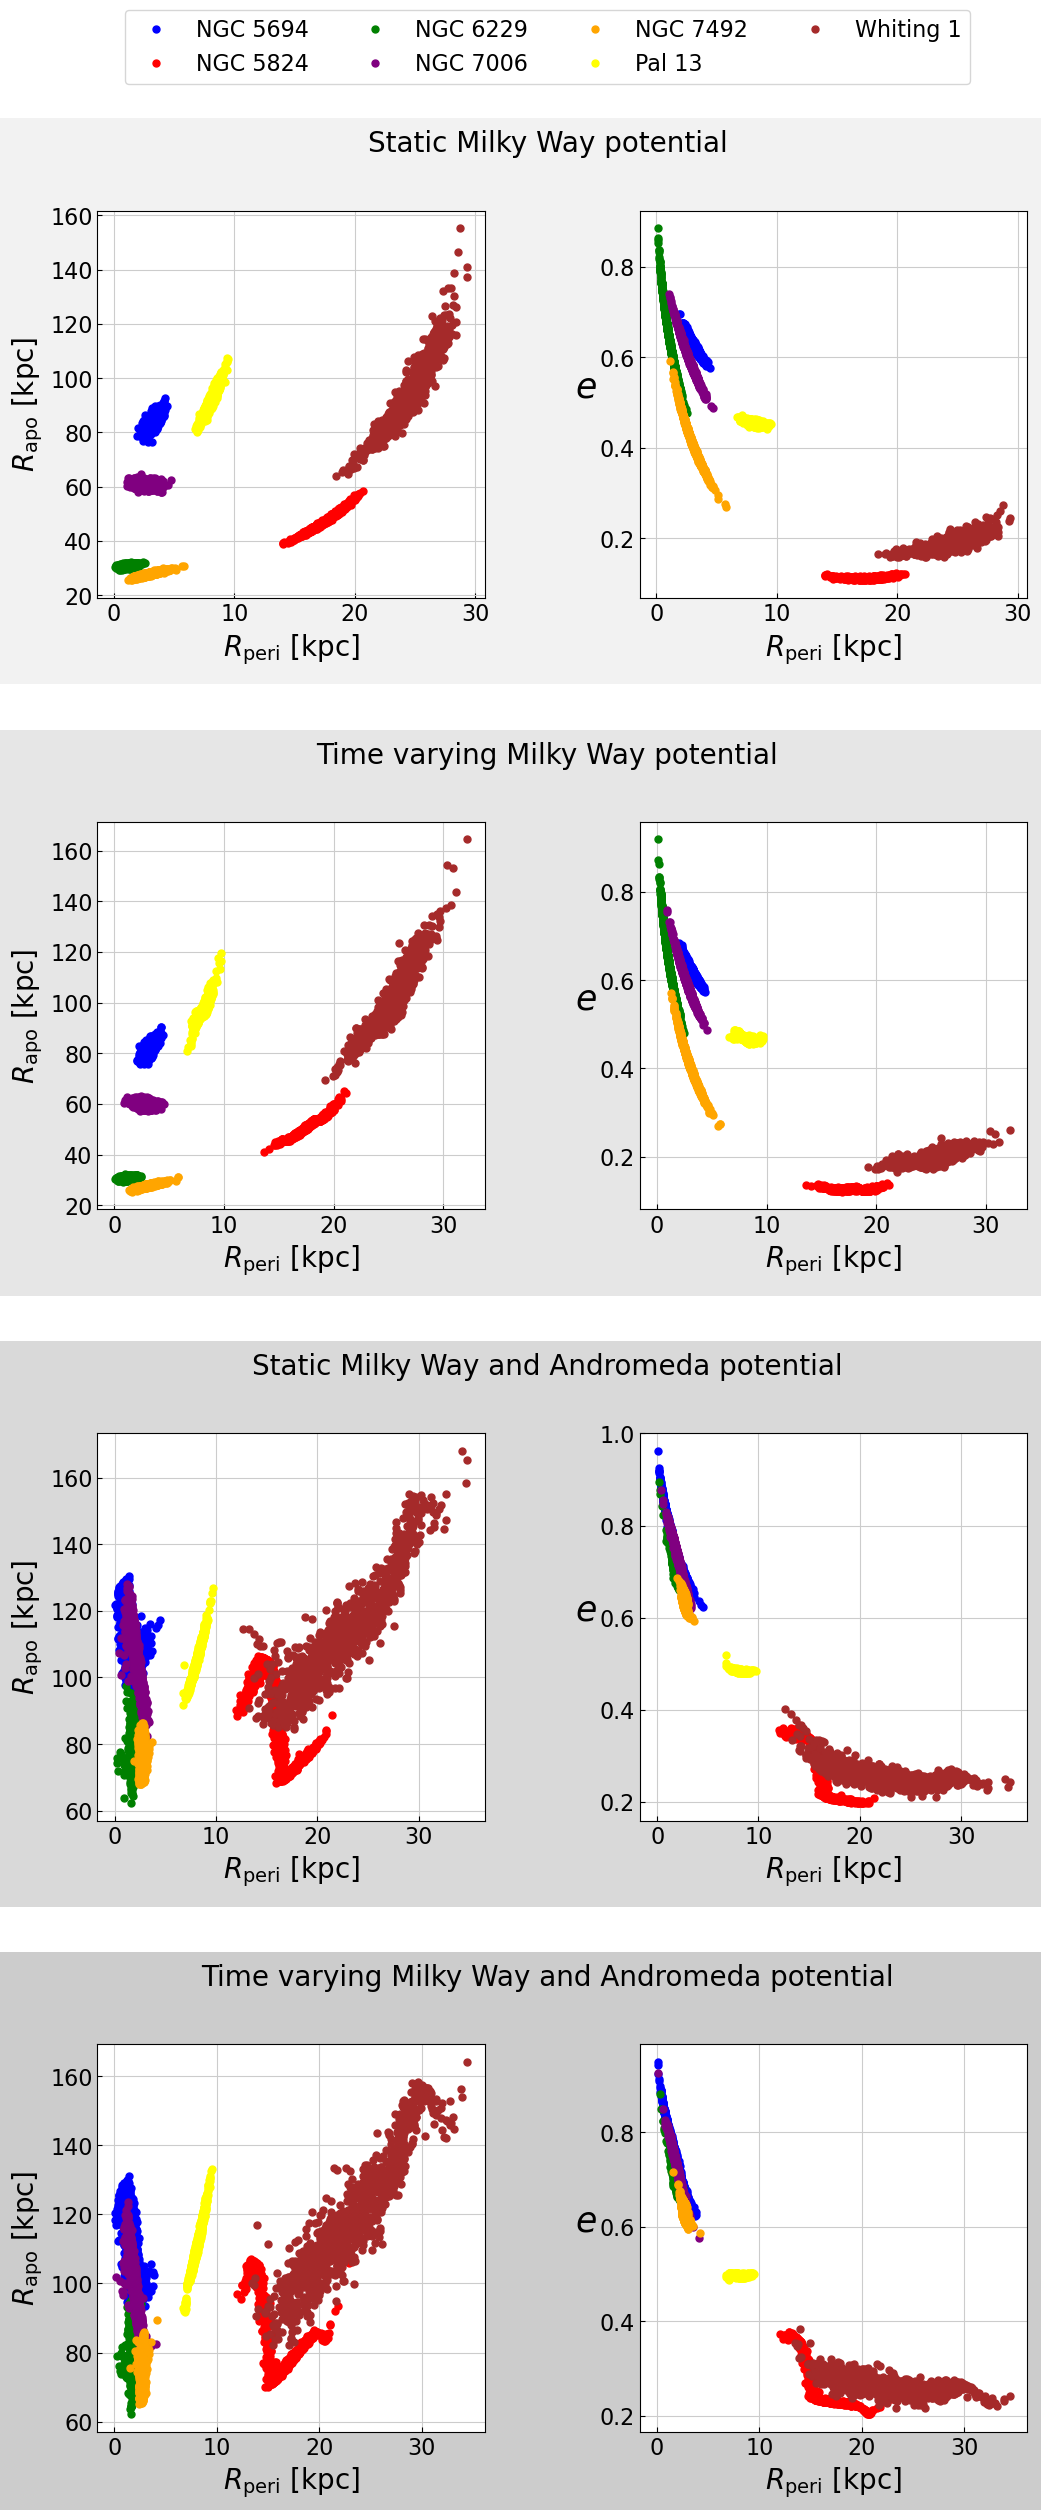

In [59]:
"""Plot the pericenters, apocenters and orbital eccentricity."""

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'brown']

fig = plt.figure(figsize=(12, 24))
# fig.suptitle('Orbits {} [Gyr] backwards in time\nfor NGC 6229'.format(t_fin),
# y=1.075, fontsize=28) # set global suptitle if desired

# Create 4x1 subfigures
(subfig1, subfig2, subfig3, subfig4) = fig.subfigures(4, 1, hspace=0.08)
(ax11, ax12) = subfig1.subplots(1, 2)  # Create 1x2 subplots on subfig1
(ax21, ax22) = subfig2.subplots(1, 2)  # Create 1x2 subplots on subfig2
(ax31, ax32) = subfig3.subplots(1, 2)  # Create 1x2 subplots on subfig3
(ax41, ax42) = subfig4.subplots(1, 2)  # Create 1x2 subplots on subfig4
plt.subplots_adjust(wspace=0.4)

# Set suptitle for subfig1
subfig1.suptitle('Static Milky Way potential', fontsize=20)
subfig1.set_facecolor('0.95')
ax11.plot(Rperi_11, Rapo_11, color=colors[0], ls='', marker='.', markersize=10,
          label='NGC 5694')
ax11.plot(Rperi_12, Rapo_12, color=colors[1], ls='', marker='.', markersize=10,
          label='NGC 5824')
ax11.plot(Rperi_13, Rapo_13, color=colors[2], ls='', marker='.', markersize=10,
          label='NGC 6229')
ax11.plot(Rperi_14, Rapo_14, color=colors[3], ls='', marker='.', markersize=10,
          label='NGC 7006')
ax11.plot(Rperi_15, Rapo_15, color=colors[4], ls='', marker='.', markersize=10,
          label='NGC 7492')
ax11.plot(Rperi_16, Rapo_16, color=colors[5], ls='', marker='.', markersize=10,
          label='Pal 13')
ax11.plot(Rperi_17, Rapo_17, color=colors[6], ls='', marker='.', markersize=10,
          label='Whiting 1')
ax11.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax11.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax11.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax11.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax11.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax11.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax11.grid(color='0.8')
ax11.set_box_aspect(1)
ax12.plot(Rperi_11, el_11, color=colors[0], ls='', marker='.', markersize=10)
ax12.plot(Rperi_12, el_12, color=colors[1], ls='', marker='.', markersize=10)
ax12.plot(Rperi_13, el_13, color=colors[2], ls='', marker='.', markersize=10)
ax12.plot(Rperi_14, el_14, color=colors[3], ls='', marker='.', markersize=10)
ax12.plot(Rperi_15, el_15, color=colors[4], ls='', marker='.', markersize=10)
ax12.plot(Rperi_16, el_16, color=colors[5], ls='', marker='.', markersize=10)
ax12.plot(Rperi_17, el_17, color=colors[6], ls='', marker='.', markersize=10)
ax12.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax12.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax12.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax12.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax12.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax12.set_ylabel(r"$\mathit{e}$", size=25, rotation=0, labelpad=10)
ax12.grid(color='0.8')
ax12.set_box_aspect(1)

# Set suptitle for subfig2
subfig2.suptitle('Time varying Milky Way potential', fontsize=20)
subfig2.set_facecolor('0.90')
ax21.plot(Rperi_21, Rapo_21, color=colors[0], ls='', marker='.', markersize=10)
ax21.plot(Rperi_22, Rapo_22, color=colors[1], ls='', marker='.', markersize=10)
ax21.plot(Rperi_23, Rapo_23, color=colors[2], ls='', marker='.', markersize=10)
ax21.plot(Rperi_24, Rapo_24, color=colors[3], ls='', marker='.', markersize=10)
ax21.plot(Rperi_25, Rapo_25, color=colors[4], ls='', marker='.', markersize=10)
ax21.plot(Rperi_26, Rapo_26, color=colors[5], ls='', marker='.', markersize=10)
ax21.plot(Rperi_27, Rapo_27, color=colors[6], ls='', marker='.', markersize=10)
ax21.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax21.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax21.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax21.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax21.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax21.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax21.grid(color='0.8')
ax21.set_box_aspect(1)
ax22.plot(Rperi_21, el_21, color=colors[0], ls='', marker='.', markersize=10)
ax22.plot(Rperi_22, el_22, color=colors[1], ls='', marker='.', markersize=10)
ax22.plot(Rperi_23, el_23, color=colors[2], ls='', marker='.', markersize=10)
ax22.plot(Rperi_24, el_24, color=colors[3], ls='', marker='.', markersize=10)
ax22.plot(Rperi_25, el_25, color=colors[4], ls='', marker='.', markersize=10)
ax22.plot(Rperi_26, el_26, color=colors[5], ls='', marker='.', markersize=10)
ax22.plot(Rperi_27, el_27, color=colors[6], ls='', marker='.', markersize=10)
ax22.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax22.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax22.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax22.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax22.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax22.set_ylabel(r"$\mathit{e}$", size=25, rotation=0, labelpad=10)
ax22.grid(color='0.8')
ax22.set_box_aspect(1)

# Set suptitle for subfig3
subfig3.suptitle('Static Milky Way and Andromeda potential', fontsize=20)
subfig3.set_facecolor('0.85')
ax31.plot(Rperi_31, Rapo_31, color=colors[0], ls='', marker='.', markersize=10)
ax31.plot(Rperi_32, Rapo_32, color=colors[1], ls='', marker='.', markersize=10)
ax31.plot(Rperi_33, Rapo_33, color=colors[2], ls='', marker='.', markersize=10)
ax31.plot(Rperi_34, Rapo_34, color=colors[3], ls='', marker='.', markersize=10)
ax31.plot(Rperi_35, Rapo_35, color=colors[4], ls='', marker='.', markersize=10)
ax31.plot(Rperi_36, Rapo_36, color=colors[5], ls='', marker='.', markersize=10)
ax31.plot(Rperi_37, Rapo_37, color=colors[6], ls='', marker='.', markersize=10)
ax31.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax31.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax31.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax31.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax31.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax31.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax31.grid(color='0.8')
ax31.set_box_aspect(1)
ax32.plot(Rperi_31, el_31, color=colors[0], ls='', marker='.', markersize=10)
ax32.plot(Rperi_32, el_32, color=colors[1], ls='', marker='.', markersize=10)
ax32.plot(Rperi_33, el_33, color=colors[2], ls='', marker='.', markersize=10)
ax32.plot(Rperi_34, el_34, color=colors[3], ls='', marker='.', markersize=10)
ax32.plot(Rperi_35, el_35, color=colors[4], ls='', marker='.', markersize=10)
ax32.plot(Rperi_36, el_36, color=colors[5], ls='', marker='.', markersize=10)
ax32.plot(Rperi_37, el_37, color=colors[6], ls='', marker='.', markersize=10)
ax32.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax32.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax32.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax32.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax32.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax32.set_ylabel(r"$\mathit{e}$", size=25, rotation=0, labelpad=10)
ax32.grid(color='0.8')
ax32.set_box_aspect(1)

# Set suptitle for subfig4
subfig4.suptitle('Time varying Milky Way and Andromeda potential', fontsize=20)
subfig4.set_facecolor('0.80')
ax41.plot(Rperi_41, Rapo_41, color=colors[0], ls='', marker='.', markersize=10)
ax41.plot(Rperi_42, Rapo_42, color=colors[1], ls='', marker='.', markersize=10)
ax41.plot(Rperi_43, Rapo_43, color=colors[2], ls='', marker='.', markersize=10)
ax41.plot(Rperi_44, Rapo_44, color=colors[3], ls='', marker='.', markersize=10)
ax41.plot(Rperi_45, Rapo_45, color=colors[4], ls='', marker='.', markersize=10)
ax41.plot(Rperi_46, Rapo_46, color=colors[5], ls='', marker='.', markersize=10)
ax41.plot(Rperi_47, Rapo_47, color=colors[6], ls='', marker='.', markersize=10)
ax41.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax41.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax41.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax41.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax41.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax41.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax41.grid(color='0.8')
ax41.set_box_aspect(1)
ax42.plot(Rperi_41, el_41, color=colors[0], ls='', marker='.', markersize=10)
ax42.plot(Rperi_42, el_42, color=colors[1], ls='', marker='.', markersize=10)
ax42.plot(Rperi_43, el_43, color=colors[2], ls='', marker='.', markersize=10)
ax42.plot(Rperi_44, el_44, color=colors[3], ls='', marker='.', markersize=10)
ax42.plot(Rperi_45, el_45, color=colors[4], ls='', marker='.', markersize=10)
ax42.plot(Rperi_46, el_46, color=colors[5], ls='', marker='.', markersize=10)
ax42.plot(Rperi_47, el_47, color=colors[6], ls='', marker='.', markersize=10)
ax42.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax42.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax42.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax42.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax42.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax42.set_ylabel(r"$\mathit{e}$", size=25, rotation=0, labelpad=10)
ax42.grid(color='0.8')
ax42.set_box_aspect(1)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=16)

plt.savefig("Images/apo_peri_e/peri_apo_epsilon.png", bbox_inches='tight')


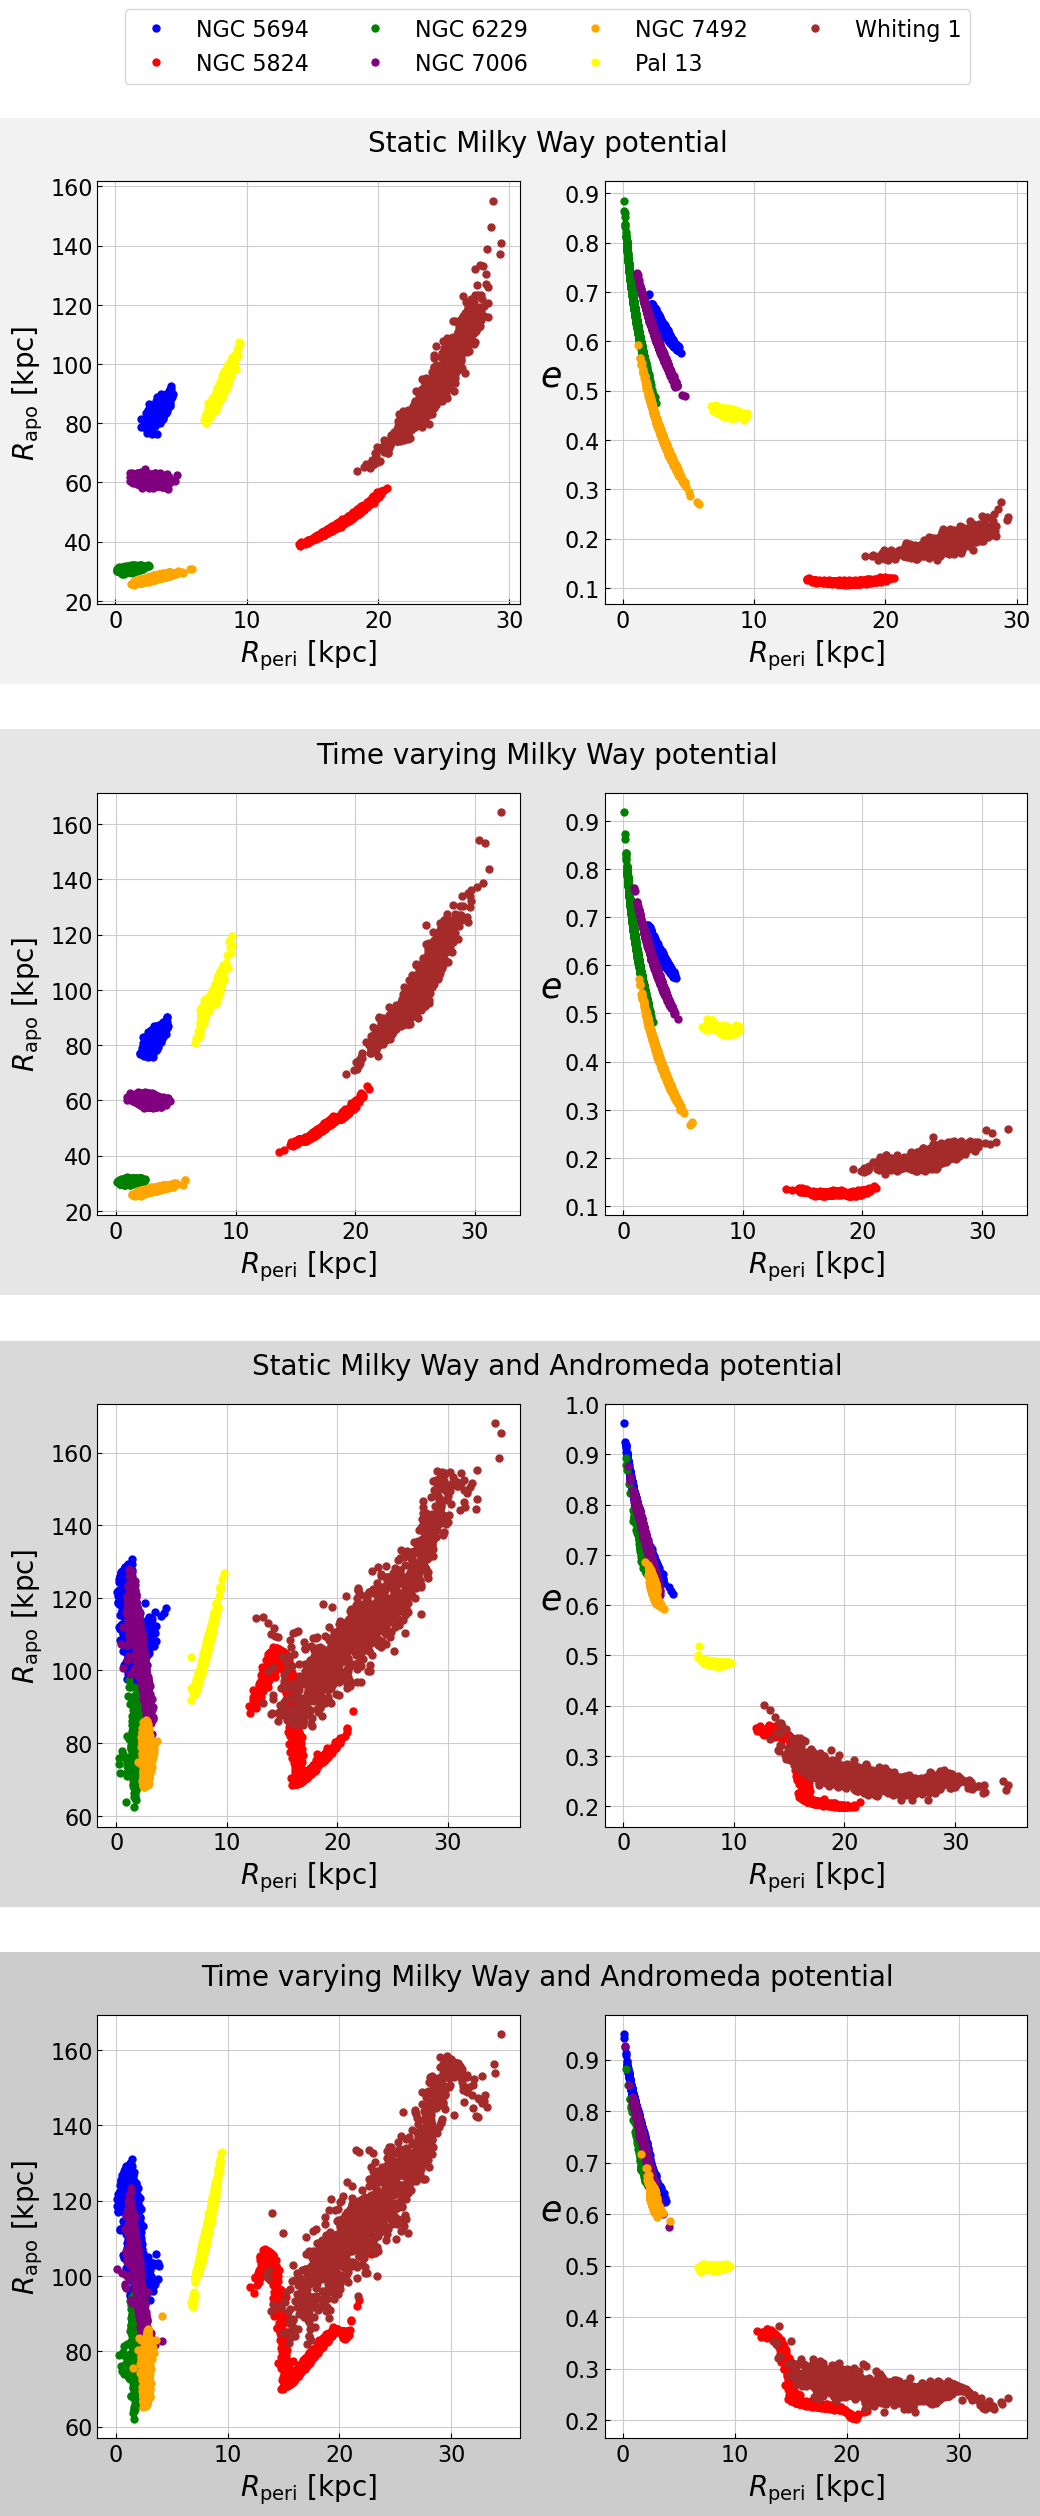

In [58]:
"""Same plots as the cell above, with a code optimized by ChatGPT."""

# Define colors and labels globally
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'brown']
labels = ['NGC 5694', 'NGC 5824', 'NGC 6229', 'NGC 7006', 'NGC 7492', 'Pal 13',
          'Whiting 1']

# Data variables (replace with your actual data)
Rperi_data = [[Rperi_11, Rperi_12, Rperi_13, Rperi_14, Rperi_15, Rperi_16,
               Rperi_17],
              [Rperi_21, Rperi_22, Rperi_23, Rperi_24, Rperi_25, Rperi_26,
               Rperi_27],
              [Rperi_31, Rperi_32, Rperi_33, Rperi_34, Rperi_35, Rperi_36,
               Rperi_37],
              [Rperi_41, Rperi_42, Rperi_43, Rperi_44, Rperi_45, Rperi_46,
               Rperi_47]]
Rapo_data = [[Rapo_11, Rapo_12, Rapo_13, Rapo_14, Rapo_15, Rapo_16, Rapo_17],
             [Rapo_21, Rapo_22, Rapo_23, Rapo_24, Rapo_25, Rapo_26, Rapo_27],
             [Rapo_31, Rapo_32, Rapo_33, Rapo_34, Rapo_35, Rapo_36, Rapo_37],
             [Rapo_41, Rapo_42, Rapo_43, Rapo_44, Rapo_45, Rapo_46, Rapo_47]]
el_data = [[el_11, el_12, el_13, el_14, el_15, el_16, el_17],
           [el_21, el_22, el_23, el_24, el_25, el_26, el_27],
           [el_31, el_32, el_33, el_34, el_35, el_36, el_37],
           [el_41, el_42, el_43, el_44, el_45, el_46, el_47]]

# Set up figure and subfigures
fig = plt.figure(figsize=(12, 24))
subfig_titles = ['Static Milky Way potential',
                 'Time varying Milky Way potential',
                 'Static Milky Way and Andromeda potential',
                 'Time varying Milky Way and Andromeda potential']
facecolors = ['0.95', '0.90', '0.85', '0.80']
subfigs = fig.subfigures(4, 1, hspace=0.08)


def setup_ax(ax, xlabel, ylabel, labelsize=20, grid_color='0.8'):
    """Set up axis labels, grid, and aspect ratio."""
    ax.set_xlabel(xlabel, fontsize=labelsize)
    if ylabel == r"$\mathit{e}$":
        ax.set_ylabel(ylabel, fontsize=25, rotation=0, labelpad=10)
    else:
        ax.set_ylabel(ylabel, fontsize=labelsize)
    ax.grid(color=grid_color)
    ax.set_box_aspect(1)
    ax.tick_params(axis='both', which='major', direction='in', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='in', labelsize=16)


def plot_orbit_data(ax, xdata, ydata):
    """Plot orbit data with colors and labels."""
    for i, (x, y) in enumerate(zip(xdata, ydata)):
        ax.plot(x, y, color=colors[i], ls='', marker='.', markersize=10,
                label=labels[i])
    ax.legend(loc='best', fontsize=10)
    ax.get_legend().remove()


# Create subfigures and subplots
for i, (subfig, title, facecolor) in enumerate(zip(subfigs, subfig_titles,
                                                   facecolors)):
    subfig.suptitle(title, fontsize=20)
    subfig.set_facecolor(facecolor)
    ax1, ax2 = subfig.subplots(1, 2)

    # Plot Rperi vs Rapo
    plot_orbit_data(ax1, Rperi_data[i], Rapo_data[i])
    setup_ax(ax1, r"$R_{\rm peri}$ [kpc]", r"$R_{\rm apo}$ [kpc]")

    # Plot Rperi vs eccentricity
    plot_orbit_data(ax2, Rperi_data[i], el_data[i])
    setup_ax(ax2, r"$R_{\rm peri}$ [kpc]", r"$\mathit{e}$")

# Adjust legend position and save figure
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4,
           fontsize=16)
plt.subplots_adjust(top=0.92)  # Adjusts layout to avoid overlap
plt.savefig("Images/apo_peri_e/peri_apo_epsilon.png", bbox_inches='tight')


In [1]:
"""Save the data in a text file."""

cluster_name = ['NGC 5694', 'NGC 5824', 'NGC 6229', 'NGC 7006', 'NGC 7492',
                'Pal 13', 'Whiting 1']

potential = ['Static Milky Way potential',
             'Time-varying Milky Way potential',
             'Static Milky Way and Andromeda potential',
             'Time-varying Milky Way and Andromeda potential']

Rperi = [[Rperi_11, Rperi_12, Rperi_13, Rperi_14, Rperi_15, Rperi_16,
          Rperi_17],
         [Rperi_21, Rperi_22, Rperi_23, Rperi_24, Rperi_25, Rperi_26,
          Rperi_27],
         [Rperi_31, Rperi_32, Rperi_33, Rperi_34, Rperi_35, Rperi_36,
          Rperi_37],
         [Rperi_41, Rperi_42, Rperi_43, Rperi_44, Rperi_45, Rperi_46,
          Rperi_47]]

Rapo = [[Rapo_11, Rapo_12, Rapo_13, Rapo_14, Rapo_15, Rapo_16, Rapo_17],
        [Rapo_21, Rapo_22, Rapo_23, Rapo_24, Rapo_25, Rapo_26, Rapo_27],
        [Rapo_31, Rapo_32, Rapo_33, Rapo_34, Rapo_35, Rapo_36, Rapo_37],
        [Rapo_41, Rapo_42, Rapo_43, Rapo_44, Rapo_45, Rapo_46, Rapo_47]]

el = [[el_11, el_12, el_13, el_14, el_15, el_16, el_17],
      [el_21, el_22, el_23, el_24, el_25, el_26, el_27],
      [el_31, el_32, el_33, el_34, el_35, el_36, el_37],
      [el_41, el_42, el_43, el_44, el_45, el_46, el_47]]


# List to store the data
data = []


def add_data(cluster_name, potential_name, r_peri, r_apo, ecc):
    """Add data to DataFrame."""
    data.append({'Cluster': cluster_name,
                 'Gravitational potential': potential_name,
                 r"$R_{\rm peri}$ [kpc]": r_peri,
                 r"$R_{\rm apo}$ [kpc]": r_apo,
                 r"$\mathit{e}$": ecc})


# Add R_peri, R_apo and e for each globular cluster and potential type.
for i in range(len(cluster_name)):
    for j in range(len(potential)):
        for k in range(1000):
            add_data(cluster_name[i], potential[j], Rperi[j][i][k],
                     Rapo[j][i][k], el[j][i][k])

# Create DataFrame
df = pd.DataFrame(data)
df.to_csv('values_MC_test.txt', sep='\t', index=False)

NameError: name 'Rperi_11' is not defined

In [3]:
"""Open the text file."""

df_loaded = pd.read_csv('values_MC_test.txt', sep='\t')


/tmp/ipykernel_8714/2631459697.py:21: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfigs[0].subplots_adjust(wspace=0.5, left=0, right=1, top=.92, bottom=.16)
/tmp/ipykernel_8714/2631459697.py:50: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfigs[1].subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)
/tmp/ipykernel_8714/2631459697.py:79: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfigs[2].subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)
/tmp/ipykernel_8714/2631459697.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfigs[3].subplots_adjust(wspace=0.5, left=0, right=1

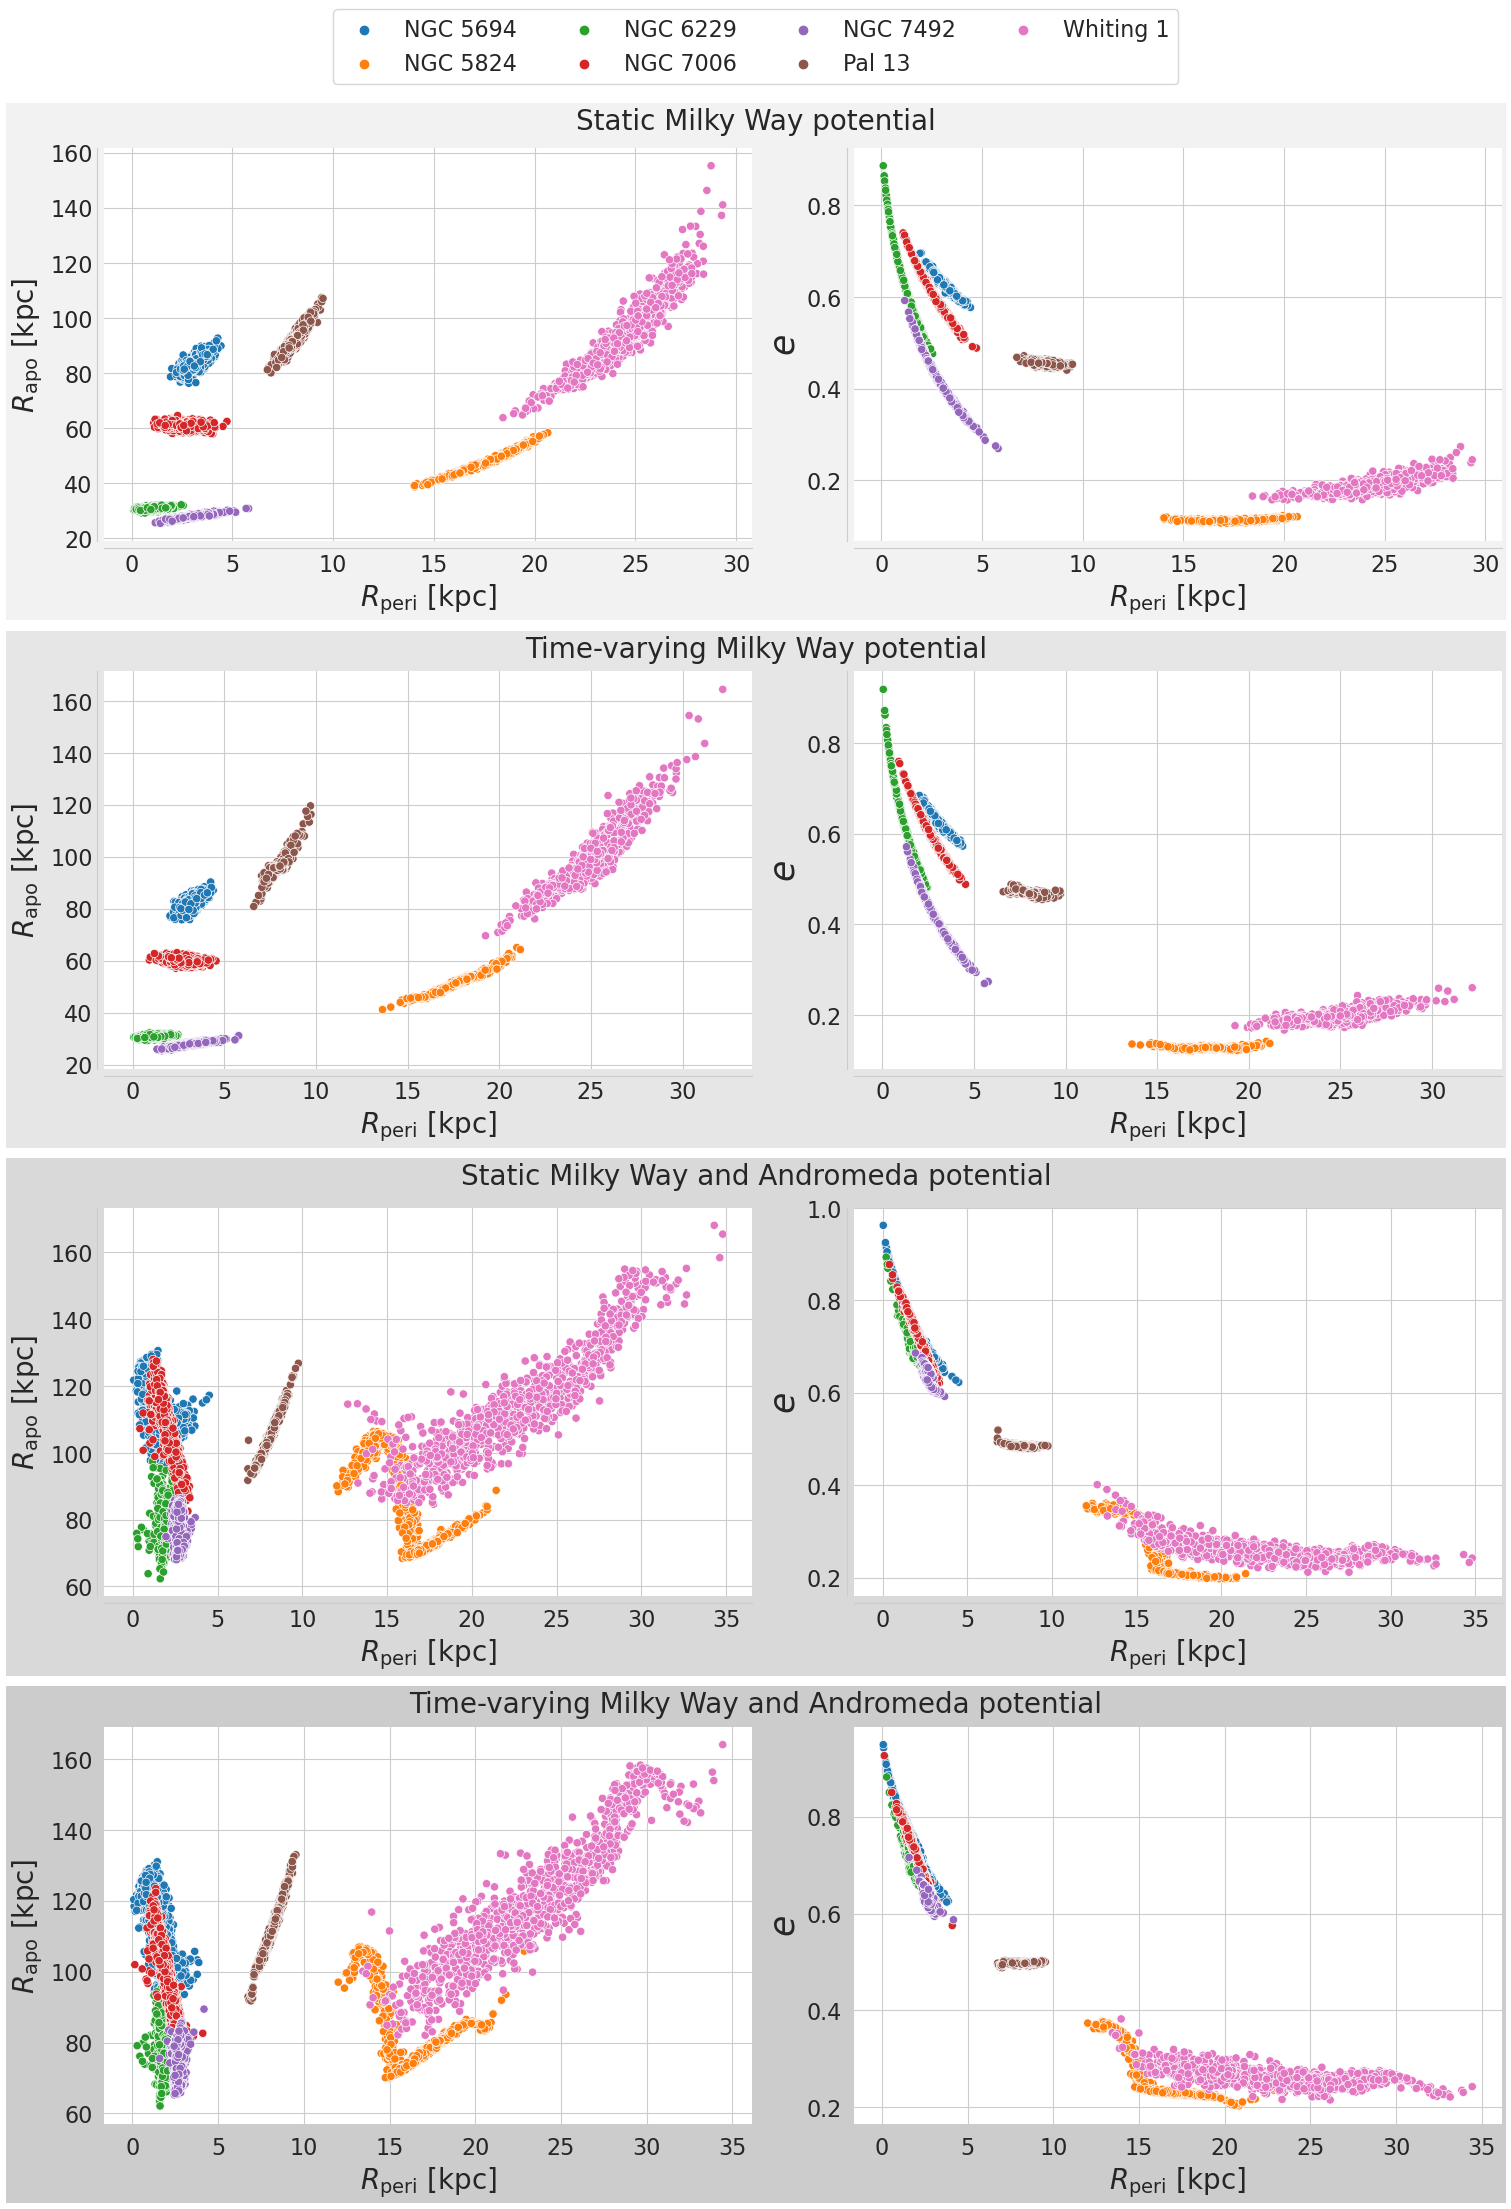

In [11]:
"""Same plots as the ones made by matplotlib, but in seaborn."""

fig = plt.figure(layout='constrained', figsize=(15, 21))

subfigs = fig.subfigures(4, 1, wspace=0.4)

subfigs[0].set_facecolor('0.95')
subfigs[0].suptitle('Static Milky Way potential', fontsize=20)

subfigs[1].set_facecolor('0.90')
subfigs[1].suptitle('Time-varying Milky Way potential', fontsize=20)

subfigs[2].set_facecolor('0.85')
subfigs[2].suptitle('Static Milky Way and Andromeda potential', fontsize=20)

subfigs[3].set_facecolor('0.80')
subfigs[3].suptitle('Time-varying Milky Way and Andromeda potential',
                    fontsize=20)

row1_axs = subfigs[0].subplots(1, 2)
subfigs[0].subplots_adjust(wspace=0.5, left=0, right=1, top=.92, bottom=.16)
ax = row1_axs[0]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Static Milky Way potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$R_{\rm apo}$ [kpc]",
                hue='Cluster', legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax = row1_axs[1]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Static Milky Way potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$\mathit{e}$", hue='Cluster')
ax.legend_.remove()
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$\mathit{e}$", fontsize=25)

row2_axs = subfigs[1].subplots(1, 2)
subfigs[1].subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)
ax = row2_axs[0]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Time-varying Milky Way potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$R_{\rm apo}$ [kpc]",
                hue='Cluster', legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax = row2_axs[1]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Time-varying Milky Way potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$\mathit{e}$", hue='Cluster',
                legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$\mathit{e}$", fontsize=25)

row3_axs = subfigs[2].subplots(1, 2)
subfigs[2].subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)
ax = row3_axs[0]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Static Milky Way and Andromeda potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$R_{\rm apo}$ [kpc]",
                hue='Cluster', legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax = row3_axs[1]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Static Milky Way and Andromeda potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$\mathit{e}$", hue='Cluster',
                legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$\mathit{e}$", fontsize=25)

row4_axs = subfigs[3].subplots(1, 2)
subfigs[3].subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)
ax = row4_axs[0]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Time-varying Milky Way and Andromeda potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$R_{\rm apo}$ [kpc]",
                hue='Cluster', legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$R_{\rm apo}$ [kpc]", fontsize=20)
ax = row4_axs[1]
sns.scatterplot(ax=ax,
                data=(df_loaded.loc[df_loaded['Gravitational potential'] ==
                      'Time-varying Milky Way and Andromeda potential']),
                x=r"$R_{\rm peri}$ [kpc]", y=r"$\mathit{e}$", hue='Cluster',
                legend=False)
sns.despine(offset=5, trim=False, ax=ax)
ax.tick_params(axis='y', which='major', direction='in', labelsize=16)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=16)
ax.tick_params(axis='x', which='major', direction='in', labelsize=16)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=16)
ax.set_xlabel(r"$R_{\rm peri}$ [kpc]", fontsize=20)
ax.set_ylabel(r"$\mathit{e}$", fontsize=25)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=16)
plt.savefig("Images/apo_peri_e/peri_apo_epsilon_seaborn.png",
            bbox_inches='tight')


/tmp/ipykernel_8714/2564218868.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfig.subplots_adjust(wspace=0.5, left=0, right=1, top=0.92, bottom=0.16)
/tmp/ipykernel_8714/2564218868.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfig.subplots_adjust(wspace=0.5, left=0, right=1, top=0.92, bottom=0.16)
/tmp/ipykernel_8714/2564218868.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfig.subplots_adjust(wspace=0.5, left=0, right=1, top=0.92, bottom=0.16)
/tmp/ipykernel_8714/2564218868.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  subfig.subplots_adjust(wspace=0.5, left=0, 

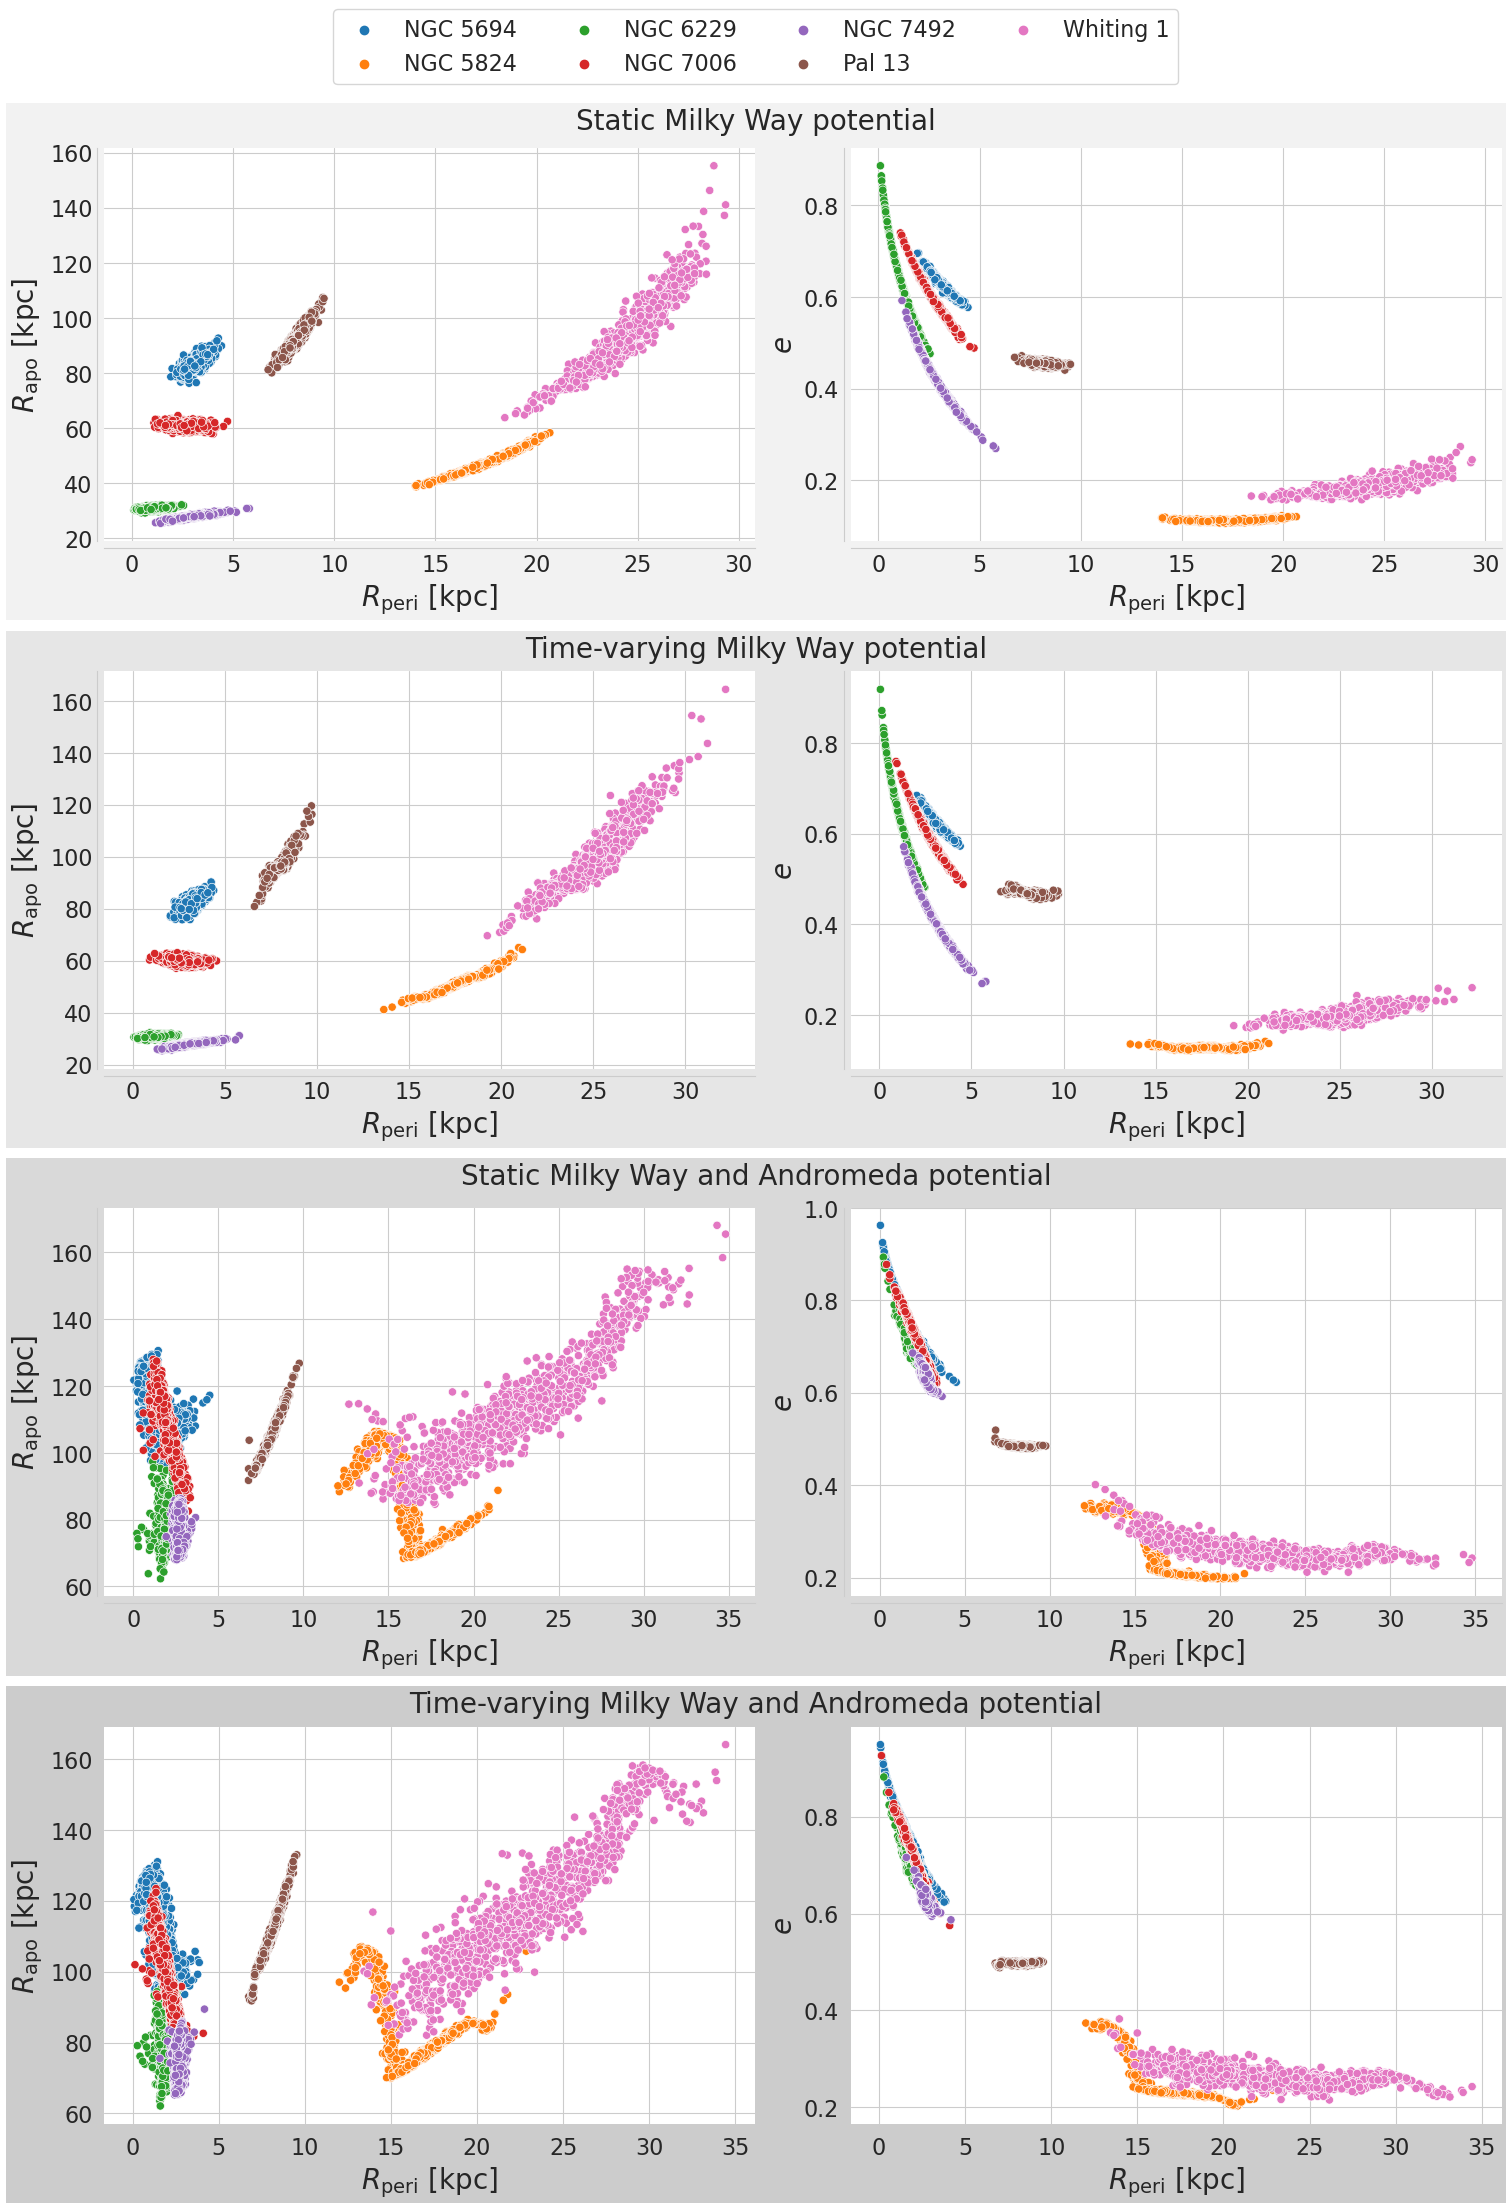

In [8]:
"""Same plots as the cell above, with a code optimized by ChatGPT."""


# Define a function to create individual scatter plots
def create_scatterplot(ax, data, x, y, xlabel, ylabel):
    """Create individual scatter plots."""
    sns.scatterplot(ax=ax, data=data, x=x, y=y, hue='Cluster')
    sns.despine(offset=5, trim=False, ax=ax)
    ax.legend_.remove()
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)


# Define a function to adjust subfigures
def adjust_subfig(subfig, color, title):
    """Adjust subfigures."""
    subfig.set_facecolor(color)
    subfig.suptitle(title, fontsize=20)
    subfig.subplots_adjust(wspace=0.5, left=0, right=1, top=0.92, bottom=0.16)


# Prepare plot layout and data selection
fig = plt.figure(layout='constrained', figsize=(15, 21))
subfig_titles = [('Static Milky Way potential', '0.95',
                  'Static Milky Way potential'),
                 ('Time-varying Milky Way potential', '0.90',
                  'Time-varying Milky Way potential'),
                 ('Static Milky Way and Andromeda potential', '0.85',
                  'Static Milky Way and Andromeda potential'),
                 ('Time-varying Milky Way and Andromeda potential', '0.80',
                  'Time-varying Milky Way and Andromeda potential')]

x_label = r"$R_{\rm peri}$ [kpc]"
y_labels = [r"$R_{\rm apo}$ [kpc]", r"$\mathit{e}$"]

# Create subfigures and scatter plots
subfigs = fig.subfigures(4, 1, wspace=0.4)
for i, (title, color, potential) in enumerate(subfig_titles):
    adjust_subfig(subfigs[i], color, title)
    row_axs = subfigs[i].subplots(1, 2)

    # Scatter plot for each axis
    create_scatterplot(row_axs[0],
                       df_loaded[df_loaded['Gravitational potential'] ==
                       potential], x_label, y_labels[0], x_label, y_labels[0])
    create_scatterplot(row_axs[1],
                       df_loaded[df_loaded['Gravitational potential'] ==
                       potential], x_label, y_labels[1], x_label, y_labels[1])

# Add legend and show plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
sns.set_style('whitegrid')
fig.legend(by_label.values(), by_label.keys(), loc='upper center',
           bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=16)
plt.savefig("Images/apo_peri_e/peri_apo_epsilon_seaborn.png",
            bbox_inches='tight')


/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

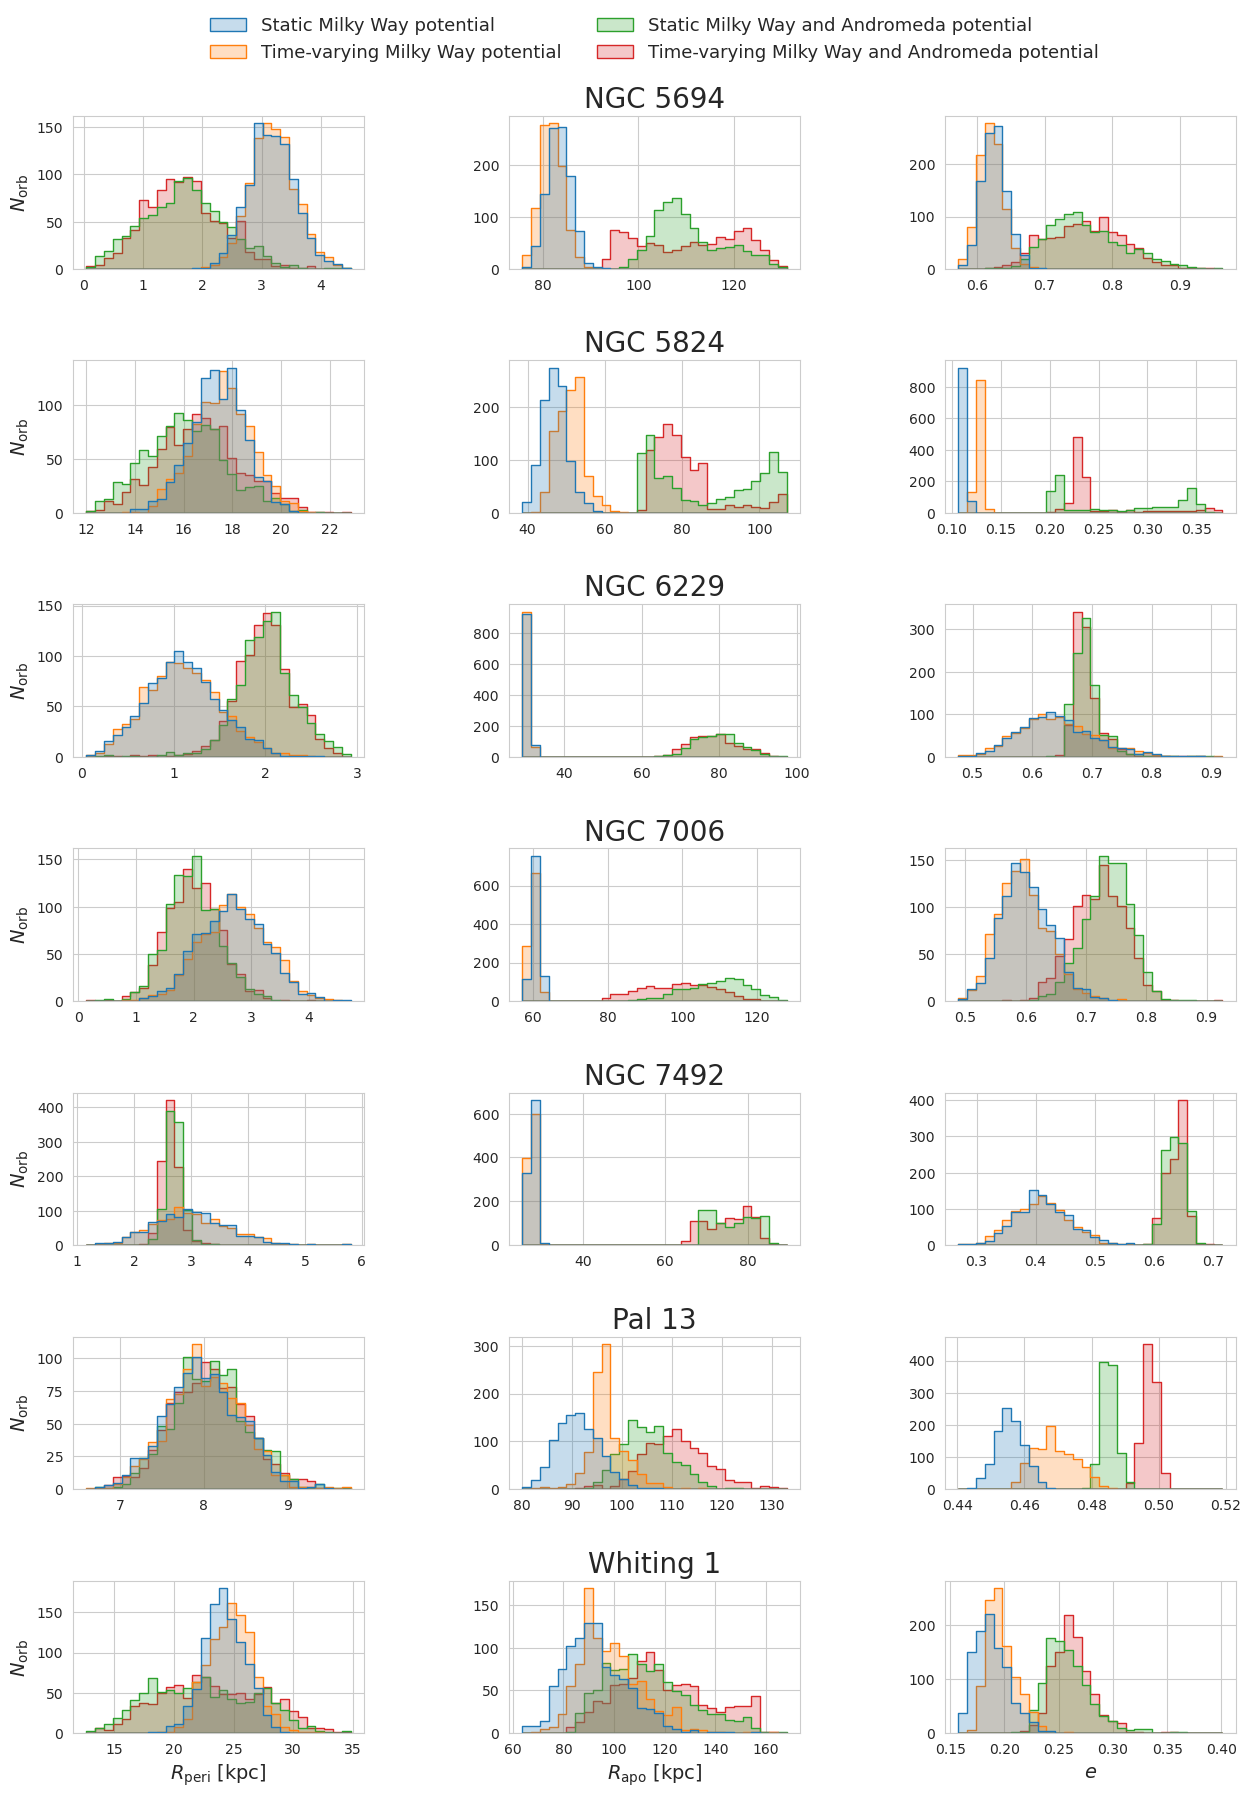

In [9]:
"""Plot the distribution of orbital parameters for each GC."""

# Create the figure and axes for a 7x3 grid
fig, axes = plt.subplots(7, 3, figsize=(15, 21))  # Adjust the size as needed

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5)

sns.histplot(ax=axes[0, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 5694']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
d = sns.histplot(ax=axes[0, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                      'NGC 5694']), x=r"$R_{\rm apo}$ [kpc]",
                 hue='Gravitational potential', element="step", bins=30)
sns.histplot(ax=axes[0, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 5694']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[1, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 5824']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[1, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 5824']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[1, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 5824']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[2, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 6229']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[2, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 6229']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[2, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 6229']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[3, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7006']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[3, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7006']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[3, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7006']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[4, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7492']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[4, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7492']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[4, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'NGC 7492']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[5, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Pal 13']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[5, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Pal 13']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[5, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Pal 13']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[6, 0], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Whiting 1']), x=r"$R_{\rm peri}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[6, 1], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Whiting 1']), x=r"$R_{\rm apo}$ [kpc]",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)
sns.histplot(ax=axes[6, 2], data=(df_loaded.loc[df_loaded['Cluster'] ==
                                  'Whiting 1']), x=r"$\mathit{e}$",
             hue='Gravitational potential', element="step", legend=False,
             bins=30)

sns.move_legend(d, "lower center", bbox_to_anchor=(.5, 1.25), ncol=2,
                title=None, frameon=False, fontsize=13)

for j in range(3):
    for i in range(6):
        axes[i, j].set(xlabel=None)

for j in range(7):
    for i in range(1, 3):
        axes[j, i].set(ylabel=None)

for i in range(7):
    axes[i, 0].set(ylabel=r"$N_{\rm orb}$")
    axes[i, 0].yaxis.get_label().set_fontsize(14)

for i in range(3):
    axes[6, i].xaxis.get_label().set_fontsize(14)

clusters = ['NGC 5694', 'NGC 5824', 'NGC 6229', 'NGC 7006', 'NGC 7492',
            'Pal 13', 'Whiting 1']
for i in range(7):
    axes[i, 1].set_title(clusters[i], fontsize=20)

sns.set_style('whitegrid')
plt.savefig("Images/apo_peri_e/distr_orb_param.png", bbox_inches='tight')


/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/javier/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

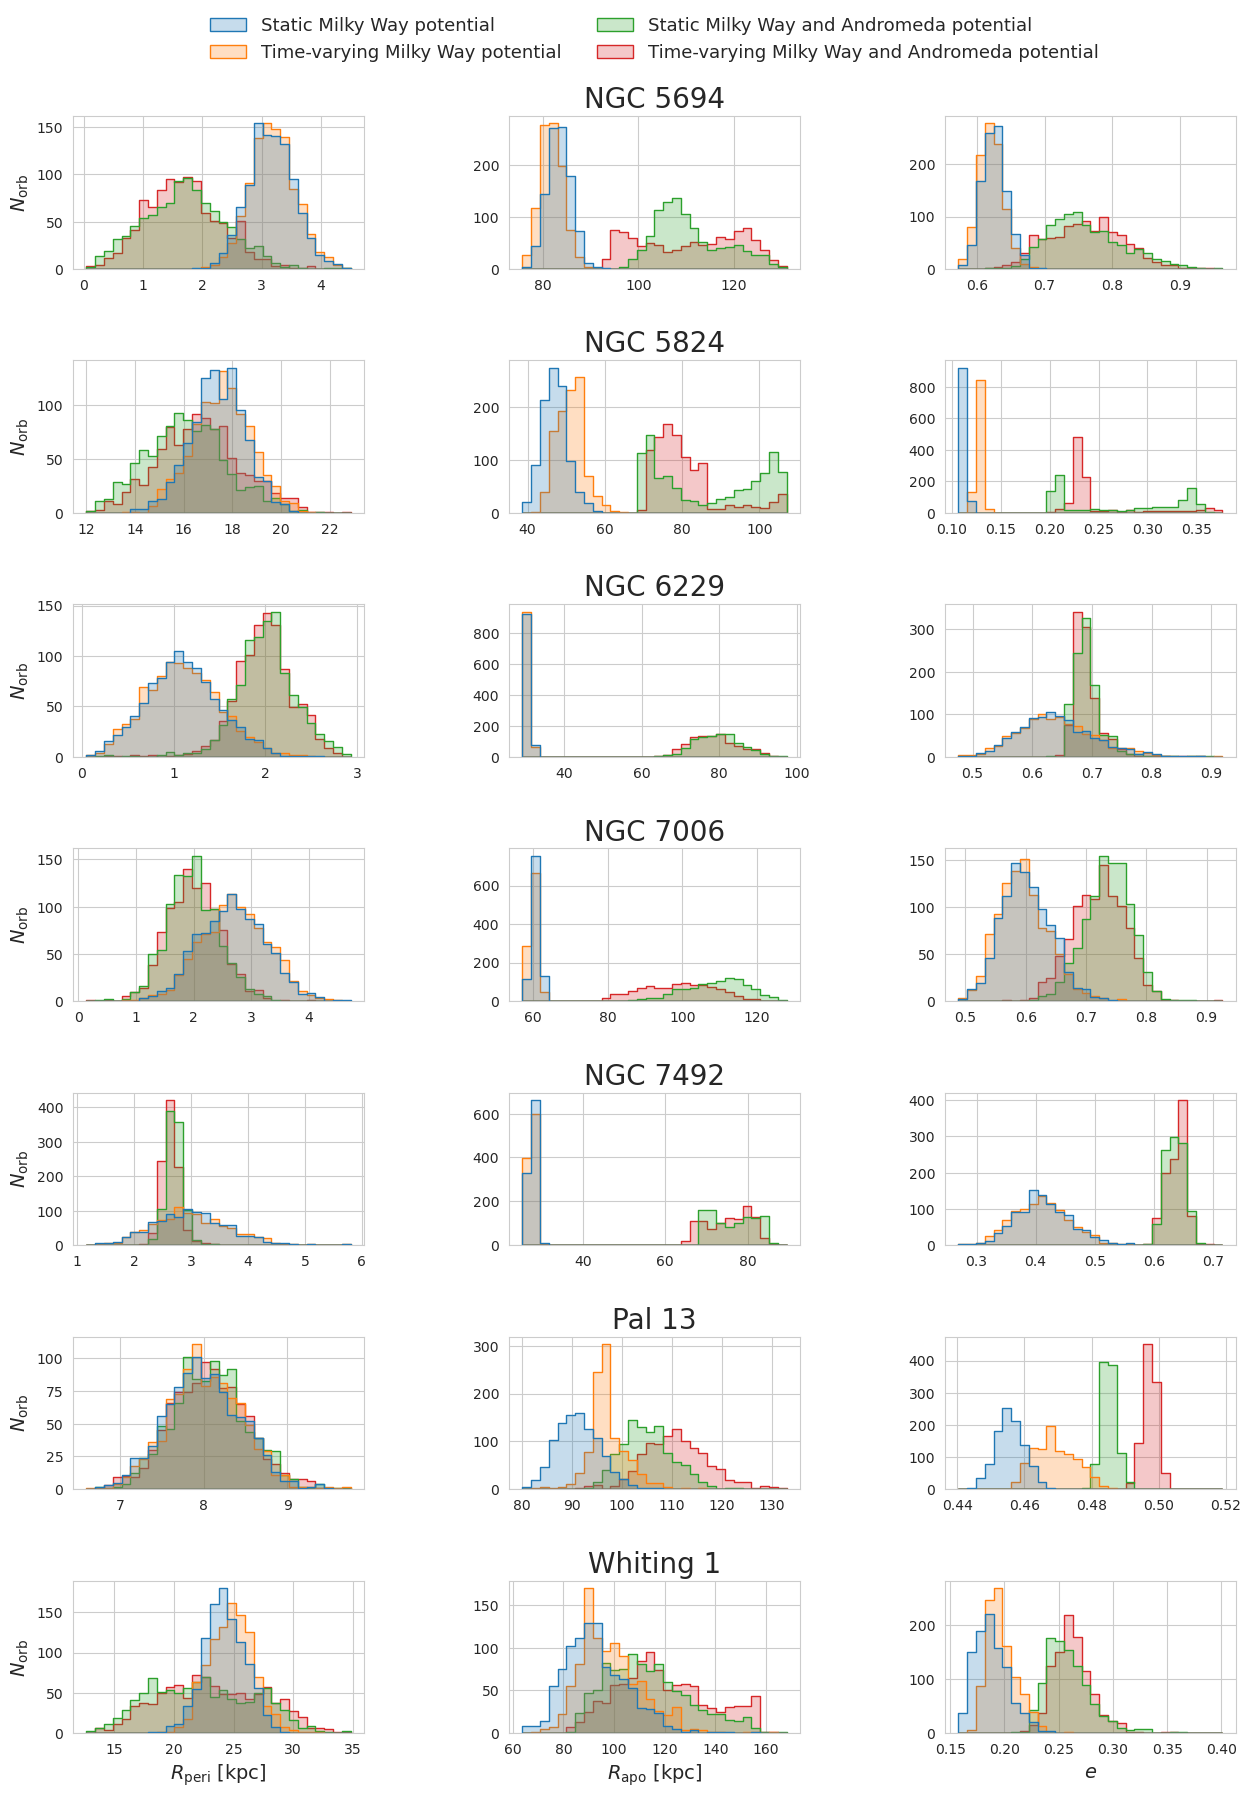

In [10]:
"""Same plots as the cell above, with a code optimized by ChatGPT."""

# Define clusters and titles for columns
clusters = ['NGC 5694', 'NGC 5824', 'NGC 6229', 'NGC 7006', 'NGC 7492',
            'Pal 13', 'Whiting 1']
column_titles = [r"$R_{\rm peri}$ [kpc]", r"$R_{\rm apo}$ [kpc]",
                 r"$\mathit{e}$"]

# Create the figure and axes for a 7x3 grid
fig, axes = plt.subplots(7, 3, figsize=(15, 21))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5)

# Generate histograms for each cluster and column
for i, cluster in enumerate(clusters):
    data = df_loaded[df_loaded['Cluster'] == cluster]
    for j, col_title in enumerate(column_titles):
        ax = axes[i, j]
        sns.histplot(
            data=data,
            x=col_title,
            hue='Gravitational potential',
            element="step",
            legend=(i == 0 and j == 1),
            bins=30,
            ax=ax
        )
        if j > 0:  # Hide y-labels for columns other than the first
            ax.set(ylabel=None)
        if i < 6:  # Hide x-labels for rows other than the last
            ax.set(xlabel=None)
    # Set the title for each row
    axes[i, 1].set_title(cluster, fontsize=20)

# Configure labels and legend
for i in range(7):
    axes[i, 0].set_ylabel(r"$N_{\rm orb}$", fontsize=14)
for j in range(3):
    axes[6, j].xaxis.get_label().set_fontsize(14)

# Position the legend outside the plots
sns.move_legend(axes[0, 1], "lower center", bbox_to_anchor=(.5, 1.25), ncol=2,
                title=None, frameon=False, fontsize=13)

sns.set_style('whitegrid')
plt.savefig("Images/apo_peri_e/distr_orb_param.png", bbox_inches='tight')
